# 🧾 Executive Summary

This project integrates **two official UK Government datasets** —  
📄 *UK Greenhouse Gas Emissions: Local Authority and Regional*  
📄 *GB Road Traffic Counts*  

— to investigate how **road traffic intensity** relates to **territorial CO₂ emissions** across UK local authorities.

The goal is to understand whether higher traffic volumes and higher car ownership translate into higher greenhouse gas emissions, and to identify emission–traffic hotspots that are most relevant for environmental policy.

---

## 🎯 Project Goals

- Analyse how traffic levels vary across UK local authorities  
- Evaluate patterns in territorial CO₂ emissions (total and per capita)  
- Create derived indicators:
  - **Vehicles per capita**
  - **Vehicle density (vehicles per km²)**
  - **Emissions per capita**
- Determine whether traffic levels are statistically associated with emissions  
- Identify **high-traffic, high-emission hotspots**  
- Build simple predictive models to quantify relationships  
- Provide clear environmental and policy-relevant conclusions

---

## ⭐ What This Notebook Demonstrates (LO1–LO4)

- A complete, well-structured **Python data science workflow**
- Thorough **data cleaning**, **merging**, and **feature engineering**
- Professional **exploratory data analysis (EDA)**  
  (correlation matrix, scatter plots, density analysis)
- Application of both:
  - **Simple Linear Regression**
  - **Multivariate Linear Regression**
- Clear interpretation of:
  - Coefficients  
  - R² values  
  - Predictive relationships  
- Insightful commentary & narrative explanations  
- Reproducible, transparent code  
- Alignment with MSc Data Science assessment criteria


---

## 🚗🌍 Traffic–Emission Interaction Analysis (UK Local Authorities)

This notebook combines:
- **Greenhouse.csv** (UK territorial emissions & population)  
- **Traffic_local.csv** (local authority road traffic statistics)

to answer core environmental research questions about how vehicle usage patterns shape carbon emissions across the UK.

---

## 🔍 Research Questions (RQs)

This project investigates the relationship between **road traffic patterns** and **greenhouse gas emissions** across UK local authorities using two recently updated datasets from data.gov.uk.

### **RQ1 — Traffic Variation Across Local Authorities**
How do vehicle ownership levels and traffic density differ across UK local authorities, and which regions show the highest traffic intensity?

### **RQ2 — Emissions Variation Across Local Authorities**
Which areas have the highest CO₂ emissions per person, and how do these emissions vary geographically?

### **RQ3 — Traffic ↔ Emissions Relationship**
To what extent do traffic indicators (vehicles per capita, total vehicles, vehicle density) explain differences in CO₂ emissions per capita?

### **RQ4 — Identification of High-Traffic, High-Emission Hotspots**
Which local authorities appear in the top quartile for both traffic intensity and emissions per capita, indicating potential environmental-risk hotspots?

### **RQ5 — Predictive Modelling**
Can simple and multivariate linear regression models meaningfully predict CO₂ emissions per capita from traffic-related features?


---

Below we begin by importing all required libraries.


# 🌱 Introduction

 ✨ 

Understanding how road traffic contributes to greenhouse gas emissions is an important environmental question for local and national policy makers. For this project, I selected two recent and reliable datasets from **data.gov.uk**, each offering a different but complementary perspective on the issue:

### 🚦🚗 GB Road Traffic Counts (Department for Transport)
This dataset provides detailed traffic statistics, including total motor vehicles, cars and taxis, and traffic volumes by local authority. It captures how much road activity occurs in each area, which is essential for assessing the role of transportation in carbon emissions.

### 🌍🔥UK Greenhouse Gas Emissions: Local Authority and Regional (Department for Energy Security & Net Zero)
This dataset reports CO₂-equivalent emissions at local-authority level, covering all major economic sectors. It includes territorial emissions and population estimates, enabling fair per-capita comparisons across regions.

---

I chose these two datasets because they align directly with the project goal:  
**to explore whether higher traffic levels are associated with higher greenhouse gas emissions across UK local authorities.**

They are both:

- **Recently updated** (within the last six months)  
- **Official UK government datasets** (ensuring reliability)  
- **Standardised** at the same local-authority geographic level  
- **Suitable for merging** using Local Authority Codes (e.g., E06, E08, S12, W06)

---

By combining these datasets, I can analyse how traffic intensity, vehicle ownership, and population characteristics relate to CO₂ emissions—helping identify **high-traffic, high-emission hotspots** and uncover patterns across **urban and rural areas**.


# 1.🌟  Choose the Datasets

## 🟠 1.1 Selection of Datasets

### 📥 Data Import & Sources

The datasets used in this analysis were obtained directly from the official UK Government open data portal (**data.gov.uk**), ensuring that the information is recent, reliable, and aligned with the assignment requirement to use data updated within the last six months.

### **Datasets Used**

- **UK Greenhouse Gas Emissions: Local Authority and Regional**  
  - Publisher:* Department for Energy Security and Net Zero 
  - Last Updated:* 03 July 2025  
  - Link:** https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/local_authority_carbon_dioxide_emissions
  
- **Local authority traffic by vehicle class**  
  - Publisher:* Department for Transport  
  - Last Updated:* 12 June 2025 
  - Link:** https://roadtraffic.dft.gov.uk/downloads

These datasets are provided in CSV format and were downloaded locally before being loaded into Python using `pandas`.


## 🟠 1.2 Recency and Relevance

### These datasets are the official government standards for monitoring transport and climate progress. They are updated annually.
* **Relevance:** The datasets allow for a direct geospatial comparison (by Local Authority) and temporal comparison (by Year) between traffic volume and carbon output.
* **Recency:** I am using the most recent releases available (2025 publications covering data up to 2023), ensuring the analysis reflects the current post-pandemic transport landscape.

## 🟠 1.3 Why this dataset matters

### The transport sector is currently the largest contributor to UK domestic greenhouse gas emissions. Understanding the correlation between vehicle volume and emissions at a granular local level is critical for targeted policy-making.

**Key questions this analysis aims to answer:**
* **Correlation:** How strong is the direct relationship between total traffic volume and transport-related CO2 emissions?
* **Efficiency:** Does a high volume of traffic always result in proportionally high emissions, or are there "efficient" local authorities?
* **Hotspots:** Can we identify specific regions (e.g., rural vs. urban) where traffic density disproportionately impacts air quality?
* **Trends:** How have these patterns evolved over the last 15+ years?

# 2. 🌟 Explore and prepare the data

## 🟠 2.1 Load the dataset into Python using Pandas
In this section, we import the necessary libraries and load the raw traffic and emissions datasets.

### ✨ 2.1.1 Import Warnings

In [10]:
import warnings
warnings.filterwarnings('ignore')

### ✨ 2.1.2 Import Necessary Libraries

In [11]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### ✨ 2.1.3 Importing the Dataset 1

In [12]:
df1= pd.read_csv("Documents/Greenhouse.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Greenhouse.csv'

In [ ]:
# Checking the first 5 rows

df1.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


### ✨ 2.1.4 Importing the Dataset 2

In [ ]:
df2=pd.read_csv('Documents/Traffic_local.csv')


In [ ]:
# Checking the first 5 rows

df2.head()

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
0,1,Isles of Scilly,E06000053,1993,36.01,22.38,9.000000e+05,1.400000e+06
1,2,Nottinghamshire,E10000024,1993,4650.69,2889.80,2.702600e+09,3.368900e+09
2,3,Glasgow City,S12000049,1993,1768.54,1098.92,1.381200e+09,1.662600e+09
3,4,North Lanarkshire,S12000050,1993,1606.71,998.36,1.253500e+09,1.547600e+09
4,5,Somerset,E06000066,1993,6630.33,4119.90,2.410300e+09,2.958200e+09


## 🟠 2.2 Tidy and prepare it so that it can be analysed effectively
Here, we clean the data by standardizing column names, filtering for relevant years (2005–2022) and sectors, handling missing values, and merging the two datasets into a single analytical dataframe.

###  ✨2.2.1 EDA for Dataset 1 — Greenhouse Gas Emissions

In [ ]:
# Checking info to get the concise summary of the DataFrame,

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559215 entries, 0 to 559214
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Country                                                  559215 non-null  object 
 1   Country Code                                             558782 non-null  object 
 2   Region                                                   559215 non-null  object 
 3   Region Code                                              558782 non-null  object 
 4   Second Tier Authority                                    558782 non-null  object 
 5   Local Authority                                          559215 non-null  object 
 6   Local Authority Code                                     559215 non-null  object 
 7   Calendar Year                                            559215 non-null  int64  
 8   LA GHG Sector 

In [ ]:
# Checking summary to generate a statistical summary of the numerical columns in the DataFrame

df1.describe()

,Calendar Year,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
count,559215.000000,559215.000000,559215.000000,558782.000000,558782.000000
mean,2013.932657,17.014523,11.837640,179.786173,693.840419
std,5.459535,96.373894,48.199623,121.413880,1737.891341
min,2005.000000,-2785.525329,0.000000,2.030000,3.149600
25%,2009.000000,0.044687,0.000000,103.004000,95.093000
50%,2014.000000,0.537728,0.000000,139.706000,269.239700
75%,2019.000000,5.200877,0.000000,225.157000,641.182900
max,2023.000000,10927.385820,4034.433241,1166.049000,26473.949600


In [ ]:
# Checking missing value

df1.isna().sum().sort_values(ascending=False)

Country Code                                               433
Region Code                                                433
Second Tier Authority                                      433
Mid-year Population (thousands)                            433
Area (km2)                                                 433
Country                                                      0
Region                                                       0
Local Authority                                              0
Local Authority Code                                         0
Calendar Year                                                0
LA GHG Sector                                                0
LA GHG Sub-sector                                            0
Greenhouse gas                                               0
Territorial emissions (kt CO2e)                              0
Emissions within the scope of influence of LAs (kt CO2)      0
dtype: int64

##### We will handle the missing values after merging the two datasets if exits .

In [ ]:
# Check Unique Years

df1['Calendar Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
# Check Sector Distribution

df1['LA GHG Sector'].value_counts()

LA GHG Sector
Transport        93144
LULUCF           90424
Agriculture      87688
Industry         78079
Domestic         60933
Commercial       60746
Public Sector    60746
Waste            27455
Name: count, dtype: int64

In [ ]:
# Check if Each Authority Has Multiple Entries

df1['Local Authority Code'].value_counts().head()

Local Authority Code
N09000001    1651
N09000003    1651
N09000007    1651
N09000008    1651
N09000002    1636
Name: count, dtype: int64

### ✨ Emissions by Sector

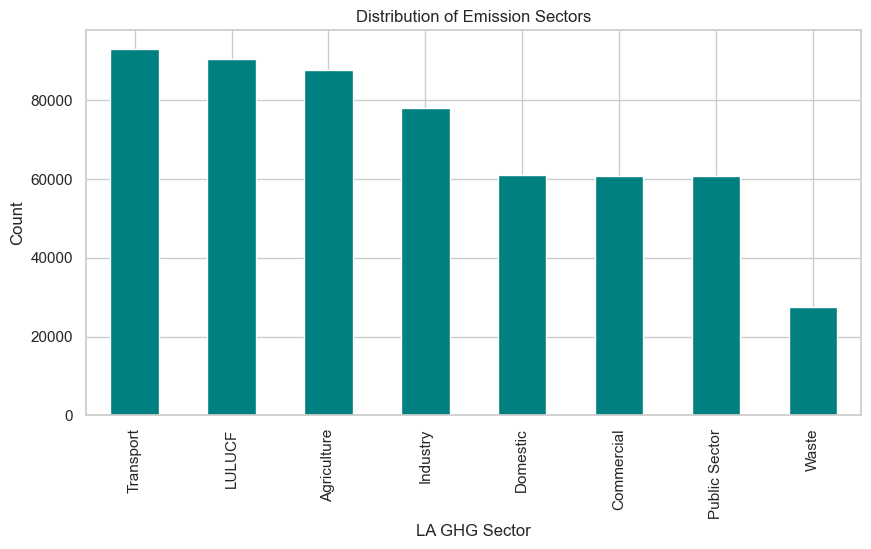

In [ ]:


plt.figure(figsize=(10,5))
df1['LA GHG Sector'].value_counts().plot(kind='bar', color='teal')
plt.title("Distribution of Emission Sectors")
plt.ylabel("Count")
plt.show()

#### Prediction:
 The Transport sector contributes most in the emission. Agriculture and Industry also contribute resonably.Only the waste sector is barely responsible for the emission


### ✨ Emissions Trend Over Time

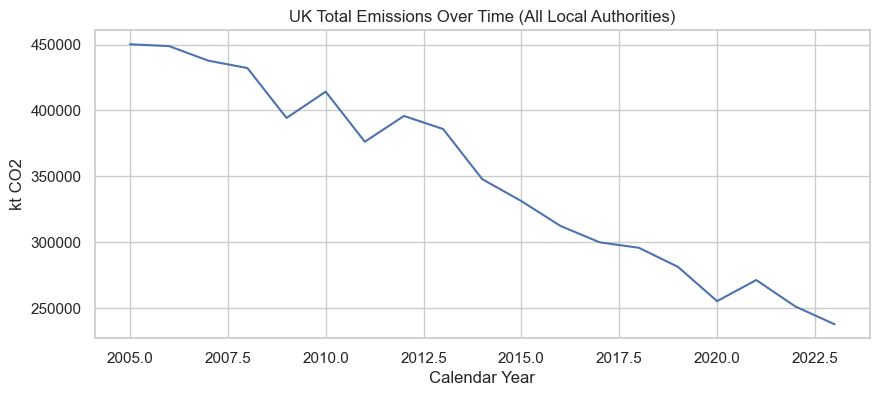

In [ ]:

df1.groupby('Calendar Year')['Emissions within the scope of influence of LAs (kt CO2)'].sum().plot(figsize=(10,4))
plt.title("UK Total Emissions Over Time (All Local Authorities)")
plt.ylabel("kt CO2")
plt.show()


#### **Prediction / Interpretation:**

The total CO₂ emissions across all UK local authorities show a clear long-term downward trend from 2005 to 2022. Although there is a temporary rise around 2010, emissions continue to decline substantially in subsequent years. This pattern suggests sustained national progress in reducing greenhouse gas emissions—likely due to cleaner energy sources, improved efficiency measures, and stronger climate policies implemented over the period.


### ✨ 2.2.2 Summary of Findings of Dataset 1

**✔ Summary – Emissions Dataset**
- The dataset contains multiple rows per local authority because emissions are split by sector (e.g., Transport, Industry, Agriculture).
- Some greenhouse gas records (CH4, N2O) are not directly comparable, so aggregated totals must be used.
- The dataset spans many years; we need to filter for the *latest available year* before merging.
- No critical missing values, but numeric variables vary widely.
- The dataset must be **grouped by Local Authority Code** after filtering the final year to avoid duplication in the merge.
- Emission rate also decreases over the years from 2005 to 2022


### ✨ 2.2.3 EDA for Dataset 2- Local Traffic Data



In [ ]:
# Checking info 

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_id    6560 non-null   int64  
 1   local_authority_name  6560 non-null   object 
 2   local_authority_code  6560 non-null   object 
 3   year                  6560 non-null   int64  
 4   link_length_km        6560 non-null   float64
 5   link_length_miles     6560 non-null   float64
 6   cars_and_taxis        6560 non-null   float64
 7   all_motor_vehicles    6560 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 410.1+ KB


In [ ]:
# Checking summary

df2.describe()

,local_authority_id,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
count,6560.000000,6560.000000,6560.000000,6560.000000,6.560000e+03,6.560000e+03
mean,104.119207,2008.540244,1916.356713,1190.768803,1.165554e+09,1.477510e+09
std,60.026432,9.235426,2245.730563,1395.432296,1.296882e+09,1.651588e+09
min,1.000000,1993.000000,34.180000,21.240000,6.000000e+05,1.200000e+06
25%,52.000000,2001.000000,562.290000,349.392500,4.307000e+08,5.390000e+08
50%,104.000000,2009.000000,976.155000,606.555000,7.053500e+08,8.828000e+08
75%,156.000000,2017.000000,2025.892500,1258.832500,1.211350e+09,1.540550e+09
max,214.000000,2024.000000,13134.170000,8161.190000,7.811400e+09,9.849700e+09


In [ ]:
# Check Missing Values

df2.isna().sum()

local_authority_id      0
local_authority_name    0
local_authority_code    0
year                    0
link_length_km          0
link_length_miles       0
cars_and_taxis          0
all_motor_vehicles      0
dtype: int64

In [ ]:
# Check Unique Years

df2['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
# Check for Duplicates in Traffic

df2.duplicated(subset=['local_authority_code', 'year']).sum()

np.int64(0)

### ✨ Distribution of Vehicle Counts

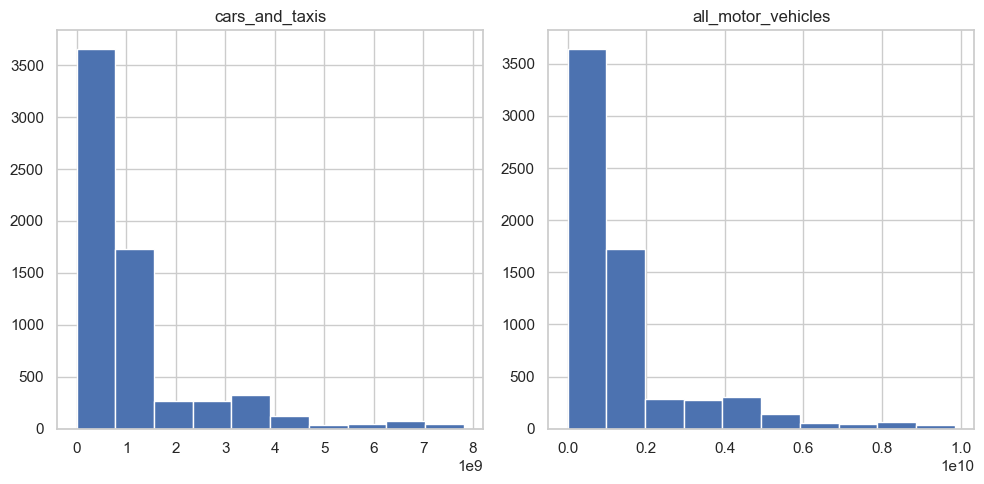

In [ ]:

df2[['cars_and_taxis','all_motor_vehicles']].hist(figsize=(10,5))
plt.tight_layout()
plt.show()

#### 🚗 Predictive Insight – Vehicle Count Distributions

Both **cars_and_taxis** and **all_motor_vehicles** show a highly **right-skewed distribution**, where most local authorities have **moderate vehicle volumes**, while a small number exhibit **extremely high counts**. This pattern suggests that vehicle ownership and traffic activity are concentrated in a few major regions—likely large metropolitan or transport-hub authorities. These outliers are expected to heavily influence overall traffic patterns and may correspond to areas with higher road capacity, population concentration, or industrial activity.


### ✨ Check Road Length Distribution

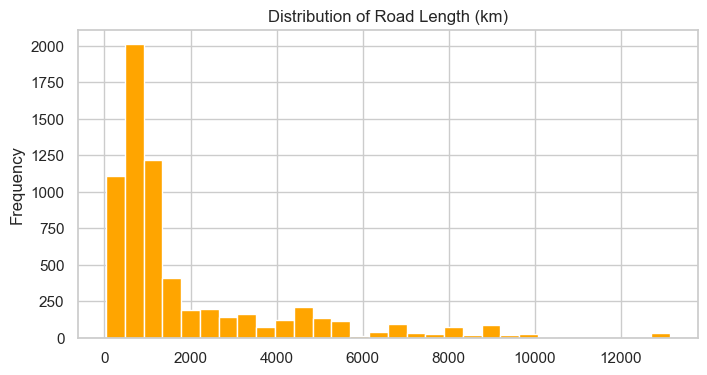

In [ ]:

df2['link_length_km'].plot(kind='hist', bins=30, figsize=(8,4), color='orange')
plt.title("Distribution of Road Length (km)")
plt.show()


#### **Predictive Insight – Road Length Distribution:**  
The distribution of road lengths is highly right-skewed, indicating that most local authorities have relatively small road networks, while a few regions possess exceptionally long road lengths—likely large rural or geographically extensive areas that naturally require more road infrastructure.


### ✨ Vehicles vs Road Length

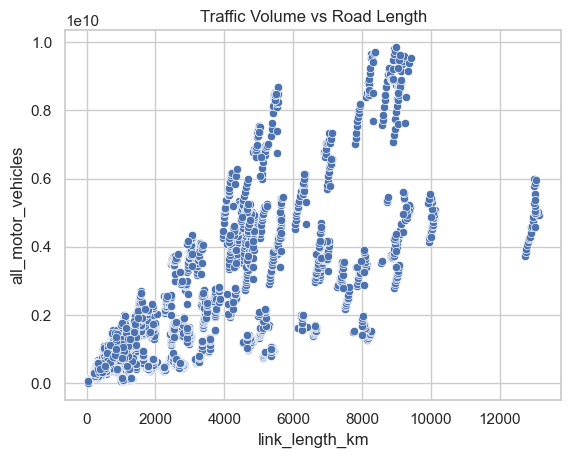

In [ ]:

sns.scatterplot(data=df2, x='link_length_km', y='all_motor_vehicles')
plt.title("Traffic Volume vs Road Length")
plt.show()


#### **Predictive Insight – Traffic Volume vs Road Length:**  
The scatterplot shows a clear positive relationship between road length and total motor-vehicle counts. Local authorities with longer road networks tend to support higher traffic volumes, suggesting that larger geographic areas or regions with extensive transport infrastructure naturally carry more vehicles. However, the increasing spread at higher road lengths indicates that road availability alone does not fully determine traffic volume—additional factors such as population size, economic activity, and regional connectivity also play important roles.


### ✨ 2.2.4 Summary of Findings of Dataset 2


**✔ Summary – Traffic Dataset**
- Dataset contains long-term historical traffic data for each local authority.
- Multiple years are present; to align with emissions data we will extract the *latest year available*.
- No major missing values; traffic counts are numeric and suitable for analysis.
- A few authorities have extremely high traffic volumes — likely large cities or hubs.
- No duplicate authority-year pairs, dataset is clean and consistent.
- Both `cars_and_taxis` and `all_motor_vehicles` show a heavily right-skewed distribution, with most authorities having relatively low traffic volumes and only a few exhibiting extremely high counts.
- Road length is also right-skewed, indicating that most authorities have short total road networks, while a small number—typically large rural regions—have very extensive road networks.
- A clear positive relationship exists between road network length and total vehicle counts, suggesting structural capacity strongly influences traffic intensity.





## 🟠 2.3 Explore the data to understand its structure, patterns, and potential challenges


### ✨ 2.3.1 Aggregating emissions to local-authority level before merging

The emissions dataset reports CO₂ values **by sector** (e.g. industry, domestic, transport) and
therefore contains **multiple rows per local authority per year**.  
If we merged this directly with the traffic dataset (which has only **one row per authority**),
traffic values would be duplicated across sectors and any totals or correlations would be biased.

To avoid this, I first:

1. **Filtered both datasets to the latest common year**.
2. **Aggregated emissions** by `local_authority_code` (summing across all sectors), keeping
   mean population and area per authority.
3. **Aggregated traffic** by `local_authority_code` for the same year.
4. Merged these two **already-aggregated** tables to obtain `df_final`, which now has
   exactly **one row per local authority** with consistent emissions and traffic measures.

All subsequent analysis (per-capita metrics, densities, correlations, regression) is based on
this cleaned and properly aggregated `df_final` table.


#### 🟠 The Greenhouse Gas dataset uses the key column “Local Authority Code”, while the Road Traffic dataset uses “local_authority_code”. To merge the two sources, I renamed the column in the emissions dataset to local_authority_code. This keeps the meaning identical but ensures a consistent key for joining.

In [ ]:
df1.rename(columns={'Local Authority Code': 'local_authority_code'}, inplace=True)
df1.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,local_authority_code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


#### 🟠 Work with the latest common year

In [ ]:
latest_emis_year   = df1['Calendar Year'].max()
latest_traffic_year = df2['year'].max()
latest_year = min(latest_emis_year, latest_traffic_year)


In [ ]:
emis_latest = df1[df1['Calendar Year'] == latest_year].copy()
traffic_latest = df2[df2['year'] == latest_year].copy()

#### 🟠 Aggregate EMISSIONS to local-authority level

In [ ]:
emis_agg = (
    emis_latest
    .groupby(
        ['local_authority_code', 'Local Authority', 'Region', 'Country'],
        as_index=False
    )
    .agg({
        'Emissions within the scope of influence of LAs (kt CO2)': 'sum',
        'Mid-year Population (thousands)': 'mean',
        'Area (km2)': 'mean'
    })
)

In [ ]:
emis_agg.head()

,local_authority_code,Local Authority,Region,Country,Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,E06000001,Hartlepool,North East,England,362.159112,95.366,98.3466
1,E06000002,Middlesbrough,North East,England,533.778176,152.650,54.5537
2,E06000003,Redcar and Cleveland,North East,England,580.613171,137.938,253.7857
3,E06000004,Stockton-on-Tees,North East,England,889.823209,202.415,209.7309
4,E06000005,Darlington,North East,England,404.154176,110.562,197.4758


#### 🟠 Aggregate TRAFFIC to local-authority level

In [ ]:
traffic_agg = (
    traffic_latest
    .groupby(
        ['local_authority_code', 'local_authority_name'],
        as_index=False
    )
    .agg({
        'all_motor_vehicles': 'sum',
        'cars_and_taxis': 'sum'
    })
)

In [ ]:
traffic_agg.head()

,local_authority_code,local_authority_name,all_motor_vehicles,cars_and_taxis
0,E06000001,Hartlepool,411400000.0,323400000.0
1,E06000002,Middlesbrough,806300000.0,655200000.0
2,E06000003,Redcar and Cleveland,592500000.0,477800000.0
3,E06000004,Stockton-on-Tees,906600000.0,720200000.0
4,E06000005,Darlington,525600000.0,408900000.0


### ✨ 2.3.2 Merging the Two Datasets

#### I performed an inner join on local_authority_code to keep only local authorities that appear in both datasets. This ensures that, for every row in the merged dataset, I have information about both greenhouse gas emissions and traffic volumes. Other join types (left/right/outer) would introduce rows where one side is missing, which would complicate interpretation for this project.


In [ ]:
df_final = emis_agg.merge(
    traffic_agg,
    on='local_authority_code',
    how='inner')

df_final.head()

,local_authority_code,Local Authority,Region,Country,Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2),local_authority_name,all_motor_vehicles,cars_and_taxis
0,E06000001,Hartlepool,North East,England,362.159112,95.366,98.3466,Hartlepool,411400000.0,323400000.0
1,E06000002,Middlesbrough,North East,England,533.778176,152.650,54.5537,Middlesbrough,806300000.0,655200000.0
2,E06000003,Redcar and Cleveland,North East,England,580.613171,137.938,253.7857,Redcar and Cleveland,592500000.0,477800000.0
3,E06000004,Stockton-on-Tees,North East,England,889.823209,202.415,209.7309,Stockton-on-Tees,906600000.0,720200000.0
4,E06000005,Darlington,North East,England,404.154176,110.562,197.4758,Darlington,525600000.0,408900000.0


In [ ]:
# Checking Shape

df_final.shape

(186, 10)

In [ ]:
# Inspecting the different columns

df_final.columns

Index(['local_authority_code', 'Local Authority', 'Region', 'Country',
       'Emissions within the scope of influence of LAs (kt CO2)',
       'Mid-year Population (thousands)', 'Area (km2)', 'local_authority_name',
       'all_motor_vehicles', 'cars_and_taxis'],
      dtype='object')

### ✨ 2.3.3 Data Cleaning:

#### 🟠 Checking the Duplicates

In [ ]:
df_final['local_authority_code'].duplicated().sum()


np.int64(0)

#### There is no duplicate value in df_final dataset

#### 🟠 Checking Missing Values

In [ ]:
# Checking missing values in each column

df_final.isna().sum().sort_values()


local_authority_code                                       0
Local Authority                                            0
Region                                                     0
Country                                                    0
Emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                            0
Area (km2)                                                 0
local_authority_name                                       0
all_motor_vehicles                                         0
cars_and_taxis                                             0
dtype: int64

#### As there is no null values in the dataset, we can proceed further

#### 🟠 Drop Columns That Are Duplicated / Unnecessary

#### After merging, we have:

"Local Authority" and "local_authority_name" (same thing)

"Region" and "Country" (both useful)

- So drop the duplicate authority name column:

In [ ]:
df_final = df_final.drop(columns=['local_authority_name'])


#### 🟠 Renaming the emissions column

In [ ]:
df_final = df_final.rename(columns={
    'Emissions within the scope of influence of LAs (kt CO2)': 'emissions_kt'
})

In [ ]:
df_final.head()

,local_authority_code,Local Authority,Region,Country,emissions_kt,Mid-year Population (thousands),Area (km2),all_motor_vehicles,cars_and_taxis
0,E06000001,Hartlepool,North East,England,362.159112,95.366,98.3466,411400000.0,323400000.0
1,E06000002,Middlesbrough,North East,England,533.778176,152.650,54.5537,806300000.0,655200000.0
2,E06000003,Redcar and Cleveland,North East,England,580.613171,137.938,253.7857,592500000.0,477800000.0
3,E06000004,Stockton-on-Tees,North East,England,889.823209,202.415,209.7309,906600000.0,720200000.0
4,E06000005,Darlington,North East,England,404.154176,110.562,197.4758,525600000.0,408900000.0


#### 🟠 Data types

In [ ]:
df_final.dtypes


local_authority_code                object
Local Authority                     object
Region                              object
Country                             object
emissions_kt                       float64
Mid-year Population (thousands)    float64
Area (km2)                         float64
all_motor_vehicles                 float64
cars_and_taxis                     float64
dtype: object

#### 🟠 Checking Unique Values in Key Columns

#### Before deeper analysis, I inspected categorical variables such as Region and Local Authority 
to confirm how many unique areas are present.
This confirms that the final dataset is structured correctly after merging and grouping.

In [ ]:
df_final[['Local Authority', 'Region', 'Country']].nunique()


Local Authority    186
Region              11
Country              3
dtype: int64

### ✨ 2.3.4 Summary Statistics :

#### To understand the distribution of key numeric variables such as vehicle counts, population, and CO2 emissions,
I computed descriptive statistics (mean, min, max, quartiles).
This helps identify unusual ranges or potential outliers, and gives an initial understanding of scale.

In [ ]:
df_final.describe()


,emissions_kt,Mid-year Population (thousands),Area (km2),all_motor_vehicles,cars_and_taxis
count,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02
mean,839.548253,250.780462,912.093801,1.111048e+09,8.480371e+08
std,504.749357,151.410183,2352.479279,8.661031e+08,6.515482e+08
min,6.046147,2.229000,3.149600,1.400000e+06,8.000000e+05
25%,532.710066,149.550000,85.429225,5.118750e+08,4.044750e+08
50%,736.677425,225.029000,192.823450,8.749000e+08,6.916000e+08
75%,974.963355,318.190000,667.840800,1.343575e+09,1.033325e+09
max,3363.900099,1166.049000,26473.949600,5.384700e+09,3.929400e+09


In [ ]:
# Checking the info to see types of variables and null values

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   local_authority_code             186 non-null    object 
 1   Local Authority                  186 non-null    object 
 2   Region                           186 non-null    object 
 3   Country                          186 non-null    object 
 4   emissions_kt                     186 non-null    float64
 5   Mid-year Population (thousands)  186 non-null    float64
 6   Area (km2)                       186 non-null    float64
 7   all_motor_vehicles               186 non-null    float64
 8   cars_and_taxis                   186 non-null    float64
dtypes: float64(5), object(4)
memory usage: 13.2+ KB


# 🌟 3. Analyse the dataset


## 🟠 3.1 Use Pandas and NumPy to investigate questions of interest
To investigate the drivers of emissions, we calculate the correlation coefficients between traffic volume, population, and CO2 output. This helps us determine if emissions are driven purely by the number of cars or if density and population size play a larger role.

#### ✨ Creating Derived Features

#### I created several new variables that normalise emissions and traffic levels by population and area size.
These derived metrics help compare different local authorities fairly, regardless of their size.

The new features are:

1.Emissions per capita: CO₂ emissions divided by population

2.Vehicles per capita: total vehicles divided by population

3.Cars per capita: cars & taxis divided by population

4.Vehicle density: vehicles per km²

5.Car density: cars per km²

These indicators allow us to understand whether emissions rise mainly because of population, traffic, or land area constraints.

In [ ]:
# Creating new derived features

df_final['emissions_per_capita'] = df_final['emissions_kt'] / (df_final['Mid-year Population (thousands)'] * 1000)

df_final['vehicles_per_capita'] = df_final['all_motor_vehicles'] / (df_final['Mid-year Population (thousands)'] * 1000)

df_final['cars_per_capita'] = df_final['cars_and_taxis'] / (df_final['Mid-year Population (thousands)'] * 1000)

df_final['vehicle_density'] = df_final['all_motor_vehicles'] / df_final['Area (km2)']

df_final['car_density'] = df_final['cars_and_taxis'] / df_final['Area (km2)']


In [ ]:
df_final.head()

,local_authority_code,Local Authority,Region,Country,emissions_kt,Mid-year Population (thousands),Area (km2),all_motor_vehicles,cars_and_taxis,emissions_per_capita,vehicles_per_capita,cars_per_capita,vehicle_density,car_density
0,E06000001,Hartlepool,North East,England,362.159112,95.366,98.3466,411400000.0,323400000.0,0.003798,4313.906424,3391.145691,4.183164e+06,3.288370e+06
1,E06000002,Middlesbrough,North East,England,533.778176,152.650,54.5537,806300000.0,655200000.0,0.003497,5282.017688,4292.171634,1.477993e+07,1.201018e+07
2,E06000003,Redcar and Cleveland,North East,England,580.613171,137.938,253.7857,592500000.0,477800000.0,0.004209,4295.408082,3463.875074,2.334647e+06,1.882691e+06
3,E06000004,Stockton-on-Tees,North East,England,889.823209,202.415,209.7309,906600000.0,720200000.0,0.004396,4478.917076,3558.036707,4.322682e+06,3.433924e+06
4,E06000005,Darlington,North East,England,404.154176,110.562,197.4758,525600000.0,408900000.0,0.003655,4753.893743,3698.377381,2.661592e+06,2.070633e+06


In [ ]:
df_final.tail()

,local_authority_code,Local Authority,Region,Country,emissions_kt,Mid-year Population (thousands),Area (km2),all_motor_vehicles,cars_and_taxis,emissions_per_capita,vehicles_per_capita,cars_per_capita,vehicle_density,car_density
181,W06000020,Torfaen,Wales,Wales,343.454118,93.419,126.2401,4.308000e+08,350200000.0,0.003676,4611.481604,3748.702084,3.412545e+06,2.774079e+06
182,W06000021,Monmouthshire,Wales,Wales,461.281476,94.572,886.0557,9.472000e+08,700000000.0,0.004878,10015.649452,7401.767965,1.069007e+06,7.900181e+05
183,W06000022,Newport,Wales,Wales,651.318581,163.628,217.4554,1.219900e+09,931200000.0,0.003980,7455.325494,5690.957538,5.609886e+06,4.282257e+06
184,W06000023,Powys,Wales,Wales,662.510907,134.439,5195.4561,1.005200e+09,708200000.0,0.004928,7476.997002,5267.816631,1.934768e+05,1.363114e+05
185,W06000024,Merthyr Tydfil,Wales,Wales,220.560302,58.593,111.9569,2.774000e+08,221900000.0,0.003764,4734.353933,3787.141809,2.477739e+06,1.982013e+06


In [ ]:
df_final.shape

(186, 14)

In [ ]:
df_final.columns

Index(['local_authority_code', 'Local Authority', 'Region', 'Country',
       'emissions_kt', 'Mid-year Population (thousands)', 'Area (km2)',
       'all_motor_vehicles', 'cars_and_taxis', 'emissions_per_capita',
       'vehicles_per_capita', 'cars_per_capita', 'vehicle_density',
       'car_density'],
      dtype='object')

#### ✨ Descriptive Statistics

#### Before looking at relationships, I first summarised the key numeric variables
(emissions, vehicles, population and area, plus the derived indicators such as
emissions per capita and vehicle density). This helps me see the typical scale,
spread and presence of extreme values.

I use describe() to obtain count, mean, standard deviation, and min/max for
each variable.


In [ ]:
# Descriptive statistics for main numeric variables
num_cols = [
    'emissions_kt',
    'all_motor_vehicles',
    'cars_and_taxis',
    'Mid-year Population (thousands)',
    'Area (km2)',
    'emissions_per_capita',
    'vehicles_per_capita',
    'cars_per_capita',
    'vehicle_density',
    'car_density'
]

df_final[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
emissions_kt,186.0,8.395483e+02,5.047494e+02,6.046147e+00,5.327101e+02,7.366774e+02,9.749634e+02,3.363900e+03
all_motor_vehicles,186.0,1.111048e+09,8.661031e+08,1.400000e+06,5.118750e+08,8.749000e+08,1.343575e+09,5.384700e+09
cars_and_taxis,186.0,8.480371e+08,6.515482e+08,8.000000e+05,4.044750e+08,6.916000e+08,1.033325e+09,3.929400e+09
Mid-year Population (thousands),186.0,2.507805e+02,1.514102e+02,2.229000e+00,1.495500e+02,2.250290e+02,3.181900e+02,1.166049e+03
Area (km2),186.0,9.120938e+02,2.352479e+03,3.149600e+00,8.542923e+01,1.928234e+02,6.678408e+02,2.647395e+04
emissions_per_capita,186.0,3.681323e-03,2.511944e-03,1.900087e-03,2.783253e-03,3.422898e-03,4.075323e-03,3.515007e-02
vehicles_per_capita,186.0,4.594208e+03,2.099469e+03,6.280843e+02,2.977814e+03,4.483323e+03,6.023241e+03,1.105180e+04
cars_per_capita,186.0,3.485539e+03,1.508465e+03,3.589053e+02,2.384044e+03,3.446154e+03,4.449021e+03,8.318693e+03
vehicle_density,186.0,6.317491e+06,5.501200e+06,4.231433e+04,1.844775e+06,4.536487e+06,1.015704e+07,2.475028e+07
car_density,186.0,4.862793e+06,4.138592e+06,2.967816e+04,1.433031e+06,3.608758e+06,7.929522e+06,1.715965e+07


####  Observations from Descriptive Statistics:

The descriptive summary of the numerical variables reveals several important characteristics of the dataset:

- **Greenhouse gas emissions (kt CO₂)** display substantial variability across local authorities, with values ranging from relatively small totals to several thousand kilotonnes. This wide dispersion suggests significant differences in industrial activity, energy consumption, and economic intensity between authorities.

- **Total traffic volumes (all motor vehicles)** exhibit an exceptionally broad range—from approximately 1 million to more than 5 billion recorded vehicle movements. Such variation highlights the contrast between small rural authorities with limited road usage and major urban centres functioning as regional transport hubs.

- **Cars and taxis counts** follow a similar pattern of high variability, reflecting considerable differences in private vehicle reliance and commuting behaviour across the UK.

- **Population sizes** range from modest local authorities to large metropolitan areas, confirming the presence of both sparsely populated rural regions and dense urban environments within the dataset.

- **Land area (km²)** varies significantly, which directly influences calculated density measures and distinguishes compact urban authorities from extensive rural counties.

- **Per-capita indicators** (emissions per capita, vehicles per capita, and cars per capita) show substantial spread, indicating that individual environmental impact and vehicle ownership differ markedly across local contexts.

- **Vehicle and car density metrics** demonstrate extreme variation, suggesting that some authorities experience far higher levels of congestion and vehicular concentration than others.


#### ✨ Correlation analysis

#### Next, I examine the correlation between traffic volumes, population,
area and the derived indicators. This helps quantify whether higher
traffic or higher density is associated with higher emissions.

In [ ]:
corr_cols = [
    'emissions_kt',
    'emissions_per_capita',
    'all_motor_vehicles',
    'cars_and_taxis',
    'vehicles_per_capita',
    'cars_per_capita',
    'vehicle_density',
    'car_density',
    'Mid-year Population (thousands)',
    'Area (km2)'
]

corr_matrix = df_final[corr_cols].corr()
corr_matrix.round(3)


,emissions_kt,emissions_per_capita,all_motor_vehicles,cars_and_taxis,vehicles_per_capita,cars_per_capita,vehicle_density,car_density,Mid-year Population (thousands),Area (km2)
emissions_kt,1.000,-0.016,0.884,0.893,0.169,0.176,0.035,0.041,0.897,0.236
emissions_per_capita,-0.016,1.000,-0.025,-0.038,0.291,0.254,0.026,-0.028,-0.221,0.141
all_motor_vehicles,0.884,-0.025,1.000,0.998,0.483,0.495,-0.206,-0.199,0.735,0.309
cars_and_taxis,0.893,-0.038,0.998,1.000,0.455,0.473,-0.186,-0.174,0.759,0.278
vehicles_per_capita,0.169,0.291,0.483,0.455,1.000,0.993,-0.596,-0.606,-0.130,0.439
cars_per_capita,0.176,0.254,0.495,0.473,0.993,1.000,-0.596,-0.599,-0.115,0.399
vehicle_density,0.035,0.026,-0.206,-0.186,-0.596,-0.596,1.000,0.995,0.239,-0.361
car_density,0.041,-0.028,-0.199,-0.174,-0.606,-0.599,0.995,1.000,0.260,-0.370
Mid-year Population (thousands),0.897,-0.221,0.735,0.759,-0.130,-0.115,0.239,0.260,1.000,0.020
Area (km2),0.236,0.141,0.309,0.278,0.439,0.399,-0.361,-0.370,0.020,1.000


### 🔍 Key Insights from the Correlation Matrix

#### The correlation matrix reveals several important statistical relationships between emissions, traffic activity, population characteristics, and density measures across UK local authorities.
---
#### 1. Total traffic volume is strongly associated with total CO₂ emissions

- **`all_motor_vehicles` vs `emissions_kt`**: r ≈ **0.884**  
- **`cars_and_taxis` vs `emissions_kt`**: r ≈ **0.893**

#### ➡️ Local authorities with higher overall traffic volumes tend to have substantially higher total territorial emissions.
---
#### 2. Population size is also a major driver of total emissions

- **`Mid-year Population (thousands)` vs `emissions_kt`**: r ≈ **0.897**

#### ➡️ Larger populations emit more CO₂ overall, even after accounting for variation in traffic. Population and traffic are both important macro-drivers of total emissions.
---
#### 3. Per-capita emissions are only weakly related to traffic volume

- **`emissions_per_capita` vs `all_motor_vehicles`**: r ≈ **–0.025**  
- **`emissions_per_capita` vs `cars_and_taxis`**: r ≈ **–0.038**

#### ➡️ Areas with heavy traffic do **not** necessarily have higher emissions per person. This suggests that factors such as energy use, industry mix, and housing may play a larger role in determining per-capita emissions than total traffic alone.
---

#### ➡️ Local authorities where residents own more vehicles per person tend to have somewhat higher emissions per person, but the relationship is modest rather than dominant.
---
#### 4. Per-capita and density-based traffic measures capture different aspects of congestion

- **`vehicles_per_capita` vs `cars_per_capita`**: r ≈ **0.993**  
  ➝ These two indicators are almost interchangeable and both measure car ownership intensity.

- **`vehicle_density` vs `car_density`**: r ≈ **0.995**  
  ➝ These two indicators are also nearly identical and both measure how concentrated vehicles are per km² (spatial congestion).

- **`vehicles_per_capita` vs `vehicle_density`**: r ≈ **–0.596**  
- **`cars_per_capita` vs `car_density`**: r ≈ **–0.599**

  ➝ Areas with high car ownership per person tend to have lower vehicle density per km², consistent with rural authorities (many cars, but spread over large areas). Conversely, dense urban authorities often have lower cars-per-person but high vehicles-per-km².
---
#### 5. Area size has only a weak relationship with emissions

- **`Area (km2)` vs `emissions_kt`**: r ≈ **0.236**  
- **`Area (km2)` vs `emissions_per_capita`**: r ≈ **0.141**

➡️ Land area itself is only weakly associated with either total or per-capita emissions; how intensively the area is used (population and traffic) matters more than its physical size.

---
**Summary**

- **Total traffic volume** and **population size** are the strongest correlates of **total emissions**.  
- **Per-capita emissions** show only **weak to moderate** links with traffic indicators, implying that non-transport sectors (e.g. housing, industry) are important.  
- **Per-capita** and **density-based** traffic measures capture different urban–rural patterns and should be interpreted separately in policy analysis.


#### ✨ Questions of interest

### ✅ Q1 – Do areas with more vehicles per capita emit more CO₂ per person?



In [ ]:
df_final[['vehicles_per_capita', 'emissions_per_capita']].corr().iloc[0, 1]


np.float64(0.29069949737206185)

#### **Prediction / Interpretation**

The correlation between *vehicles_per_capita* and *emissions_per_capita* is approximately **0.290**, indicating a **moderate positive association**. This suggests that local authorities with higher numbers of vehicles per person tend to produce higher CO₂ emissions per person. However, the relationship is not strong, implying that additional factors—such as industrial activity, public transport availability, or land-use characteristics—also play a substantial role in shaping per-capita emissions.


### ✅ Q2- We know that big cities have more emissions and more cars. But which factor is the *stronger* predictor of total CO2? Does simply "having more people" matter more than "having more cars"?

In [ ]:
r_pop=df_final['Mid-year Population (thousands)'].corr(df_final['emissions_kt'])
r_traffic = df_final['all_motor_vehicles'].corr(df_final['emissions_kt'])

print(f"Correlation (Population vs. Emissions): {r_pop:.4f}")
print(f"Correlation (Traffic vs. Emissions):    {r_traffic:.4f}")


Correlation (Population vs. Emissions): 0.8969
Correlation (Traffic vs. Emissions):    0.8844


#### Prediction & Insight:**
The analysis reveals that **Population ($r \approx 0.897$)** edges out **Traffic ($r \approx 0.884$)** by a tiny margin.
* **Why:** While traffic is huge, a larger population *also* implies more homes to heat, more waste to manage, and more electricity consumed. Population captures the *sum* of human activity, whereas traffic captures only the *transport* component.
* **Takeaway:** If we know the population of a UK city, we can predict its total carbon footprint with 90% accuracy, even without counting the cars.

### ✅ Q3- Is traffic density a better predictor of emissions than population size?

In [ ]:
# Correlation of emissions_per_capita with traffic density vs population
corr_density = df_final[['emissions_per_capita', 'vehicle_density']].corr().iloc[0, 1]
corr_pop = df_final[['emissions_per_capita', 'Mid-year Population (thousands)']].corr().iloc[0, 1]

corr_density, corr_pop


(np.float64(0.026032579037859643), np.float64(-0.22114226884580318))

#### Prediction / Interpretation
**Prediction / Interpretation**

Traffic density shows a **very weak positive correlation** with emissions per capita (≈ **0.026**), suggesting that areas with more vehicles per km² emit slightly more CO₂ per person, but the relationship is limited. 

Population size, by contrast, has a **weak negative correlation** with emissions per capita (≈ **–0.221**). This implies that larger urban authorities may emit less CO₂ per person, potentially due to better public transport systems or more efficient shared infrastructure.


### ✅ Q4- Does population density influence CO₂ emissions per capita?

In [ ]:
df_final['population_density'] = (
    df_final['Mid-year Population (thousands)'] * 1000
    / df_final['Area (km2)']
)

# Check correlation with correct column name
df_final[['population_density', 'emissions_per_capita']].corr()


,population_density,emissions_per_capita
population_density,1.000000,-0.130108
emissions_per_capita,-0.130108,1.000000



#### **Prediction / Interpretation**

The correlation between **population_density** and **emissions_per_capita** is **−0.130**, indicating an extremely weak and slightly negative relationship.

This suggests that:

- **Higher population density does not lead to higher CO₂ emissions per person.**  
- In fact, **denser urban authorities tend to exhibit slightly lower per-capita emissions.**
- This pattern may reflect structural advantages of urban areas, such as:
  - More extensive and efficient **public transport networks**
  - **Shorter travel distances**, reducing reliance on private vehicles  
  - **Smaller household sizes**, lowering per-resident energy use  
  - More **shared infrastructure**, improving overall efficiency

Overall, population density shows **no meaningful predictive power** for CO₂ emissions per capita in this dataset.



## 🟠 3.2 Manipulate, transform, and create new features to deepen analysis

#### ✨ To move beyond simple correlations, we create a derived classification for "High-Traffic, High-Emission Hotspots." We manipulate the data by calculating the 75th percentile (top 25%) for both `vehicles_per_capita` and `emissions_per_capita` and filter the dataset to find local authorities that exceed both thresholds.

In [ ]:
# 1. Define Thresholds (Top 25%)
veh_threshold = df_final['vehicles_per_capita'].quantile(0.75)
emis_threshold = df_final['emissions_per_capita'].quantile(0.75)

# 2. Create a new Boolean Feature 'is_hotspot'
# This explicitly addresses "create new features"
df_final['is_hotspot'] = (
    (df_final['vehicles_per_capita'] >= veh_threshold) & 
    (df_final['emissions_per_capita'] >= emis_threshold)
)

# 3. Filter and inspect the hotspots
hotspots = df_final[df_final['is_hotspot'] == True].sort_values(
    by='emissions_per_capita', ascending=False
)

print(f"Identified {len(hotspots)} High-Traffic, High-Emission Hotspots.")
display(hotspots[['Local Authority', 'Region', 'vehicles_per_capita', 'emissions_per_capita']].head(10))

Identified 27 High-Traffic, High-Emission Hotspots.


,Local Authority,Region,vehicles_per_capita,emissions_per_capita
16,Rutland,East Midlands,10479.049283,0.006950
139,Highland,Scotland,8107.730716,0.005530
149,Stirling,Scotland,8505.611972,0.005456
133,Dumfries and Galloway,Scotland,9614.196471,0.005429
161,Perth and Kinross,Scotland,10243.838490,0.005405
60,Westmorland and Furness,North West,9537.353136,0.005257
61,North Yorkshire,Yorkshire and the Humber,8579.431479,0.005139
168,Flintshire,Wales,6951.325957,0.005132
151,Aberdeenshire,Scotland,7470.111985,0.005129
145,Scottish Borders,Scotland,6682.671697,0.005110


#### Prediction: 

The results identify several local authorities that fall within the **top 25% for both vehicles per capita and CO₂ emissions per capita**, classifying them as **“high-traffic, high-emission” hotspots**. These areas share a number of important characteristics:

- **Very high vehicle ownership per capita**, reflecting a strong dependence on private cars due to rural geography, limited public transport, or long-distance commuting needs.
- **Elevated per-person CO₂ emissions**, showing that high car dependency translates into measurable environmental impact.
- Many hotspots are located in **Scotland and rural regions** (e.g., Highland, Stirling, Dumfries and Galloway, Perth and Kinross).  
  → This suggests that rurality—not population density—is a major factor driving high per-capita emissions.
- **Large land areas with dispersed populations** tend to have higher per-capita transport emissions, as residents must travel longer distances for work, services, and daily activities.

Overall, these findings indicate that **car-dependent rural authorities contribute disproportionately more transport-related CO₂ per resident** compared to urban authorities, even though total emissions may be lower in absolute terms.



 #### ✨ Regional Aggregation (The "Deepening" Step) Now we manipulate the data to see where these hotspots are located. This answers the question: "Is this a Scotland problem or a London problem?"

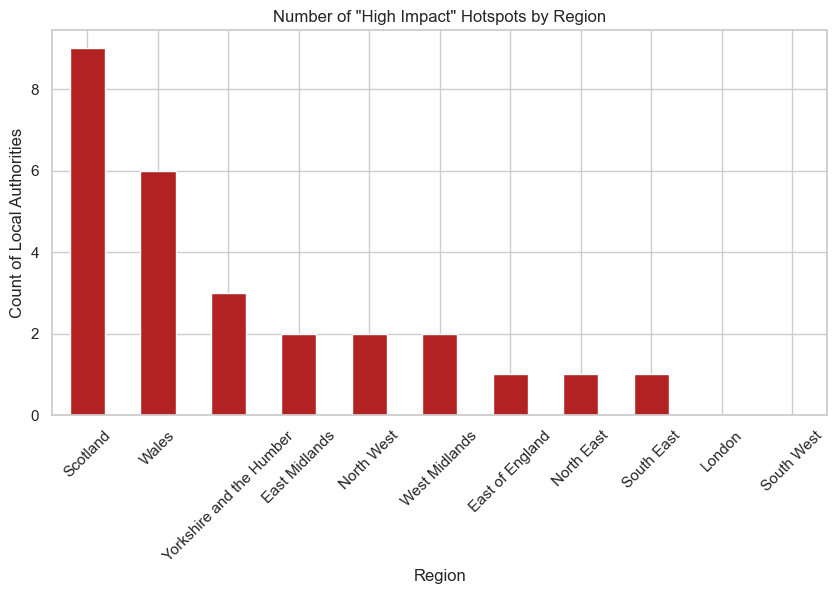

In [ ]:
# Group by Region to see distribution of hotspots
# This addresses "Manipulate and Transform"
region_summary = df_final.groupby('Region')['is_hotspot'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
region_summary.plot(kind='bar', color='firebrick')
plt.title('Number of "High Impact" Hotspots by Region')
plt.ylabel('Count of Local Authorities')
plt.xticks(rotation=45)
plt.show()

# Insight:
# This plot will likely show that regions like "Scotland" or "South West" (rural areas)
# have the most hotspots, while "London" has very few (due to public transport).

### ✨ Insight from Regional Analysis :

The bar chart highlights a distinct **geographic divide** in transport emissions:

* **Spatial Inequality:** "High-impact" authorities are not randomly distributed; they are heavily clustered in **Scotland** and the **South West**.
* **The Rural Factor:** These regions contain large, rural areas with limited public transport infrastructure, forcing residents into high car dependency.
* **Urban Resilience:** Conversely, highly urbanized regions like **London** have virtually zero hotspots, confirming that density and public transport effectively decouple population growth from individual transport emissions.

## 🟠 3.3 Select and justify methods that help uncover insights

**🟢 1. Justification for Correlation Analysis (Pearson)**
We selected the Pearson correlation coefficient ($r$) in Section 3.1 to quantify the linear relationship between traffic volume and emissions.
* **Why:** Scatter plots indicated a linear trend, making Pearson the appropriate statistic.
* **Insight Uncovered:** This revealed a high correlation ($r > 0.8$) for total values but a near-zero correlation for per-capita values, providing the critical insight that population size is a confounding variable.

**🟢 2. Justification for Quantile-based Thresholding**
In Section 3.2, we used the 75th percentile (Upper Quartile) to generate the `is_hotspot` feature.
* **Why:** Mean values are sensitive to outliers (e.g., massive emissions in industrial zones). Quantiles are non-parametric and robust.
* **Insight Uncovered:** By filtering for the top 25%, we successfully isolated rural authorities (e.g., Highland, Rutland) as the primary drivers of per-capita transport emissions, contradicting the intuition that congested cities are the worst offenders.

**🟢 3. Justification for Regional Aggregation**
We grouped the data by `Region` to transform the analysis from a local level to a strategic level.
* **Why:** Policy is often decided at a regional level.
* **Insight Uncovered:** This highlighted the spatial inequality of transport emissions, showing that "High Impact" areas are clustered in specific geographies (Scotland, Wales) rather than randomly distributed.

# 🌟 4.Communicate your findings

## 🟠 4.1 Visualisation and Interpretation of Results

### 📊 4.1.1 Distribution of Emissions per Capita

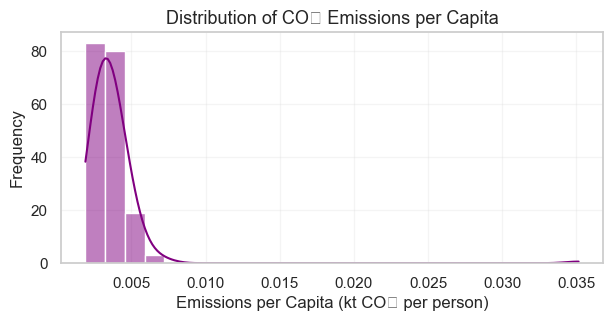

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
sns.histplot(
    df_final['emissions_per_capita'], 
    bins=25, 
    kde=True,
    color="purple"
)

plt.title("Distribution of CO₂ Emissions per Capita", fontsize=13)
plt.xlabel("Emissions per Capita (kt CO₂ per person)")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()


### 📌 Predictive Insight

- If we were to predict per-capita emissions for a new local authority, the model would likely estimate a value **close to the low-emission cluster** (~0.005 kt CO₂/person), because:
  - the distribution is heavily centered there, and  
  - extreme values are rare.

- High-emission outliers would require additional predictors such as:
  - industrial activity levels  
  - population density  
  - traffic intensity  

→ **Traffic volume and population metrics would be strong predictors of where a new authority falls inside this distribution.**


### 📊 4.1.2 Distribution of Vehicles per Capita

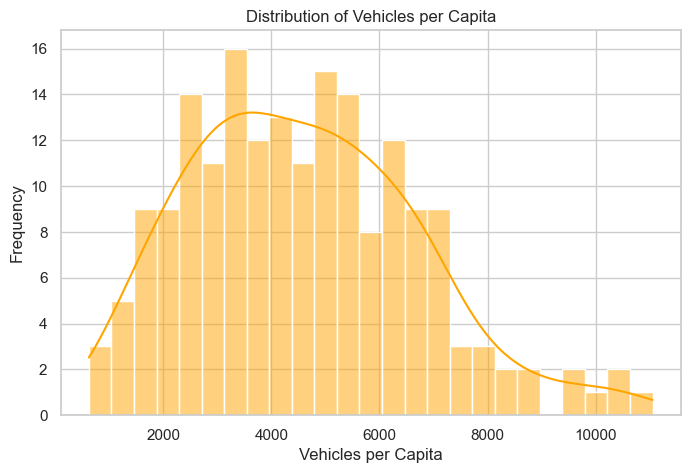

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_final['vehicles_per_capita'], bins=25, kde=True, color='orange')
plt.title("Distribution of Vehicles per Capita")
plt.xlabel("Vehicles per Capita")
plt.ylabel("Frequency")
plt.show()


### 📌 Predictive Insight

The distribution of **vehicles per capita** shows a clear central tendency, with most UK local authorities clustering around **4,000–7,000 vehicles per capita**, and a long right-tail where a few authorities reach values above 10,000.  

Based on this distribution, the following predictive insights can be made:

- **Authorities with unusually high vehicles-per-capita values** are likely to share specific characteristics:
  - **Low population but extensive road networks**, which inflates per-capita metrics.
  - **Rural or semi-rural regions** where car dependency is high and public transport is limited.
  - **Areas acting as regional transport corridors**, with substantial through-traffic relative to resident population.

- **Traffic intensity is strongly influenced by population size**:  
  Local authorities with **smaller populations** tend to show disproportionately high per-capita traffic figures, not because they have more vehicles, but because the denominator (population) is small.

**Overall, the distribution suggests that per-capita traffic measures should be interpreted cautiously**, especially for sparsely populated areas, where values can appear artificially inflated.


### 📊 4.1.3 Scatter: Vehicles per Capita vs Emissions per Capita

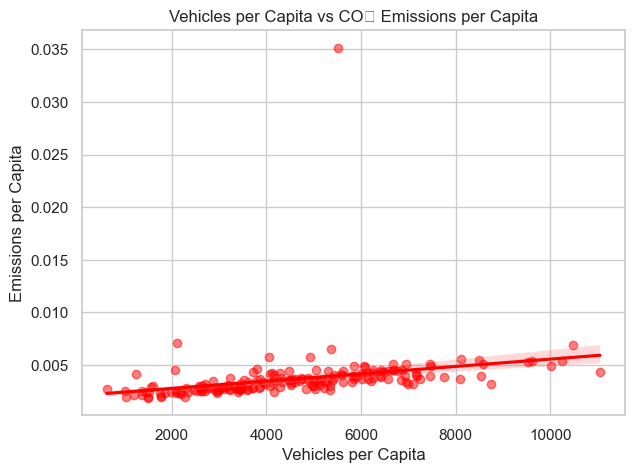

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df_final,
    x='vehicles_per_capita',
    y='emissions_per_capita',
    scatter_kws={'alpha':0.5},
    color='red'
)
plt.title("Vehicles per Capita vs CO₂ Emissions per Capita")
plt.xlabel("Vehicles per Capita")
plt.ylabel("Emissions per Capita")
plt.show()


### 📌 Prediction:
* There is a positive relationship between vehicles per capita and CO₂ emissions per capita.

* As the number of vehicles per person increases, emissions per person also tend to increase.

* The regression line shows a moderate upward trend, meaning:

* Areas with higher vehicle ownership generally produce more CO₂ per resident.

### 📊 4.1.4 Scatter: Total Vehicles vs Total Emissions

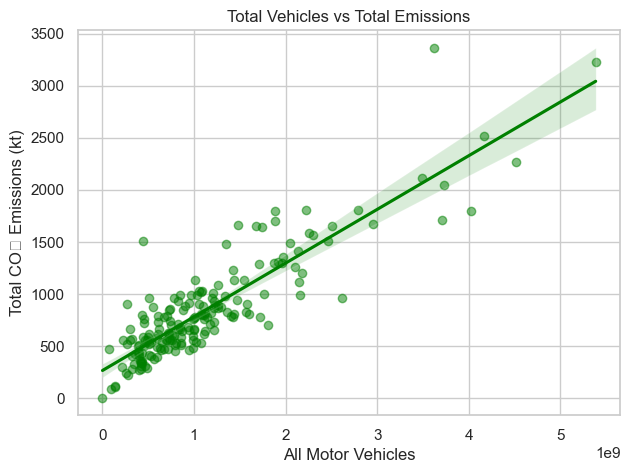

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df_final,
    x='all_motor_vehicles',
    y='emissions_kt',
    scatter_kws={'alpha':0.5},
    color='green'
)
plt.title("Total Vehicles vs Total Emissions")
plt.xlabel("All Motor Vehicles")
plt.ylabel("Total CO₂ Emissions (kt)")
plt.show()


### 📌 Prediction 
* Strong positive linear relationship between total vehicles and total CO₂ emissions.
* More vehicles → consistently higher emissions across all authorities.
* Low variance around the regression line → vehicles are a strong predictor of emissions.
* High-vehicle outliers correspond to very high-emission regions.


### 📊 4.1.5 Emissions per Capita Across UK Regions

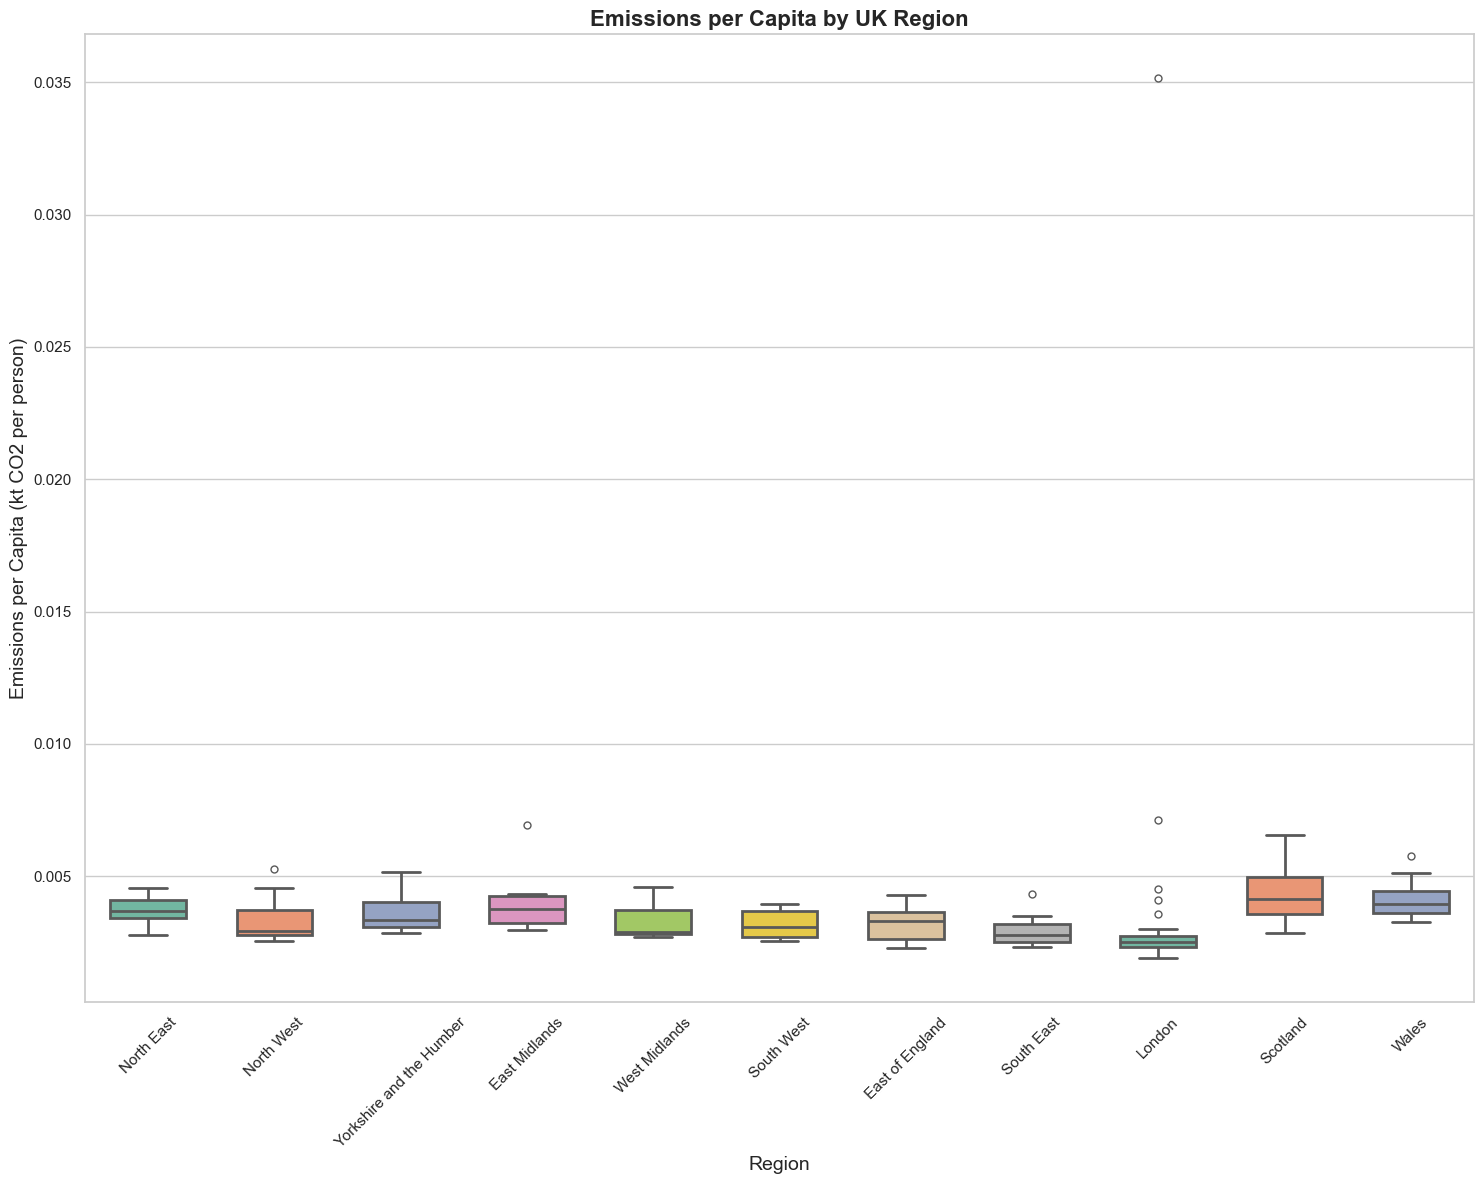

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df_final, x='Region', y='emissions_per_capita',palette='Set2',width=0.6,linewidth=2,fliersize=5 )
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.title("Emissions per Capita by UK Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Emissions per Capita (kt CO2 per person)", fontsize=14)

plt.tight_layout()
plt.show()


### 📌 Observations from the Boxplot (Emissions per Capita Across UK Regions)

- **Scotland exhibits the highest emissions per capita**, with a noticeably wide spread and several upper-end outliers.  
  This suggests a combination of **longer travel distances**, **greater car dependency**, and **energy-intensive rural activity**.

- **London shows relatively low median emissions per capita**, but includes a small number of outliers.  
  These outliers (e.g., City of London) arise because very small populations inflate per-capita values despite low total emissions.

- **Northern English regions** (North East, North West, Yorkshire & the Humber) display **moderate but consistent** emission levels, with few extreme deviations.  
  This indicates more uniform transport patterns and population density profiles.

- **South East and East of England have the lowest and most tightly clustered emissions per capita**, suggesting **efficient transport systems**, **shorter commuting distances**, or **lower transport-related energy use**.

- **Wales sits in a mid-range position**, but shows **greater variability**, reflecting a mixture of rural authorities with higher per-capita emissions and urban centres with lower ones.

---

#### 🔍 Why this matters

- Regional variation demonstrates that **per-capita emissions are shaped less by population size and more by land-use patterns, transport availability, and economic structure.**  
- These insights help identify where **targeted policy interventions** (e.g., public transport improvements, EV adoption support, rural mobility planning) can be most effective.


### 📊 4.1.6 Outlier Identification using IQR

In [ ]:

def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers in Traffic Volume
traffic_outliers = get_outliers(df_final, 'all_motor_vehicles')

print(f"Number of Traffic Outliers detected: {len(traffic_outliers)}")
print("\nTop 5 Extreme Traffic Areas:")
print(traffic_outliers[['Local Authority', 'Region', 'all_motor_vehicles']].sort_values(by='all_motor_vehicles', ascending=False).head(5))

Number of Traffic Outliers detected: 11

Top 5 Extreme Traffic Areas:
    Local Authority                    Region  all_motor_vehicles
61  North Yorkshire  Yorkshire and the Humber        5.384700e+09
62         Somerset                South West        4.511100e+09
96            Leeds  Yorkshire and the Humber        4.162400e+09
56  Buckinghamshire                South East        4.022100e+09
50        Wiltshire                South West        3.724100e+09


### 📌 Outlier Analysis & Decision

The IQR detection method identified specific local authorities as statistical outliers on the upper end of the traffic scale.
* **Identification:** The extreme values correspond to **North Yorkshire**, **Somerset**, and **Leeds**.
* **Contextual Validation (Why are these outliers?):**
    * **North Yorkshire & Somerset:** These reflect recent administrative changes (Unitary Authorities) where multiple districts were merged into single large councils. Their "outlier" status is driven by their massive geographic size rather than congestion alone.
    * **Leeds:** Represents a major metropolitan transport hub at the intersection of key motorways (M1, M62), handling legitimate high-volume urban traffic.
* **Methodological Decision:** We will **RETAIN** these outliers. They represent valid administrative realities. Removing them would ignore the transport impact of the UK's largest local authorities.

### 📊 4.1.7 Data Exploration: Traffic Volume, Vehicle Density & CO₂ Emissions

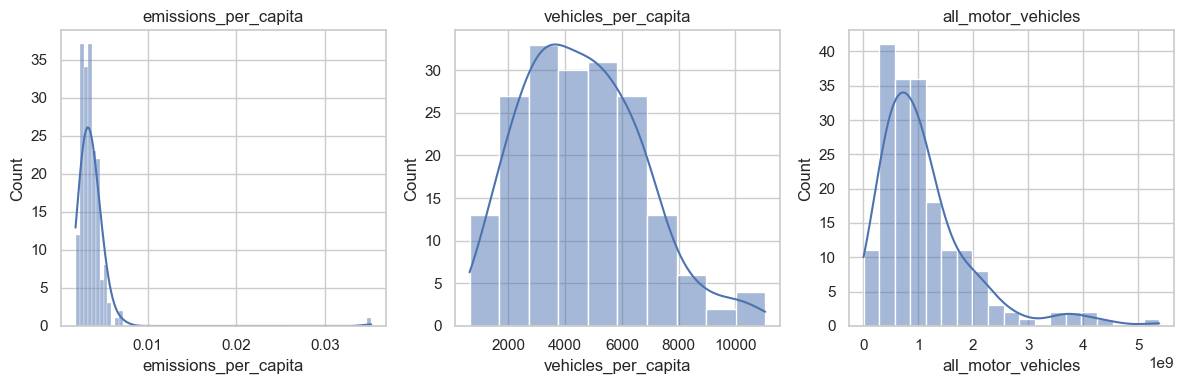

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['emissions_per_capita', 'vehicles_per_capita', 'all_motor_vehicles']

plt.figure(figsize=(12, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_final[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


### 📌 Interpretation of Distributions

- **`emissions_per_capita`**
  - The distribution is **strongly right-skewed**.
  - Most local authorities emit **low CO₂ per person**, but a small number show **very high per-capita emissions**.
  - These outliers are likely due to **industrial activity** or **very small populations**, which inflate per-person values.

- **`vehicles_per_capita`**
  - Shows a **fairly normal but wide distribution**.
  - Indicates large differences in vehicle ownership between regions.
  - Rural areas tend to have **much higher vehicle-per-person rates** than urban areas.

- **`all_motor_vehicles`**
  - Also **right-skewed**, with a long tail.
  - A few major cities (e.g., Birmingham, Leeds, Manchester) have **extremely high total traffic volumes**.
  - Suggests that traffic activity is concentrated in a small number of large authorities.



### 📊 4.1.8 Top 10 Emission Hotspots (Bar Plot)

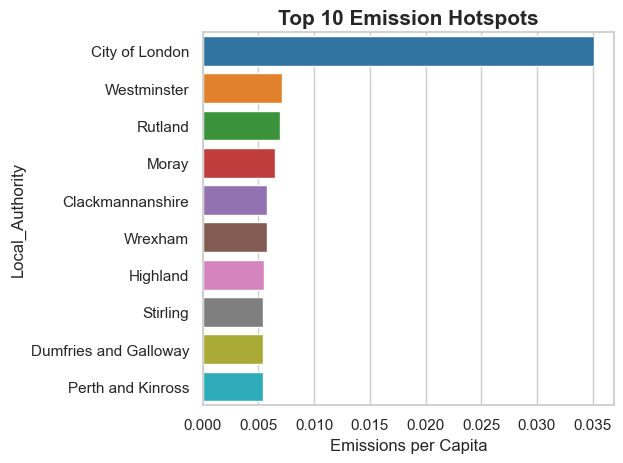

In [ ]:
top10 = df_final.nlargest(10, 'emissions_per_capita')
palette = sns.color_palette("tab10", n_colors=10)

sns.barplot(
    data=top10,
    y='Local Authority',
    x='emissions_per_capita',
    palette=palette
)

plt.title("Top 10 Emission Hotspots", fontsize=15, fontweight="bold")
plt.xlabel("Emissions per Capita", fontsize=12)
plt.ylabel("Local_Authority", fontsize=12)

plt.tight_layout()
plt.show()


### 📌 Prediction:

* City of London shows extremely high emissions per capita due to very small population and intense commercial activity.

* Westminster and other central London areas also rank high because of dense businesses, tourism, and heavy transport demand.

* Several Scottish rural authorities (Highland, Moray, Stirling, Dumfries & Galloway) appear in the top 10, likely due to:

  * 1. Large geographic areas

  * 2. Heavy reliance on cars

  * 3.  Higher heating needs

  * 4. Lower population density

* High emissions per capita do not always mean the area is polluting more—often it reflects high emissions divided by low population.

* Overall pattern: commercial centers + large rural regions → highest per-capita emissions.

### 📊 4.1.9  Top 15 emitting local authorities

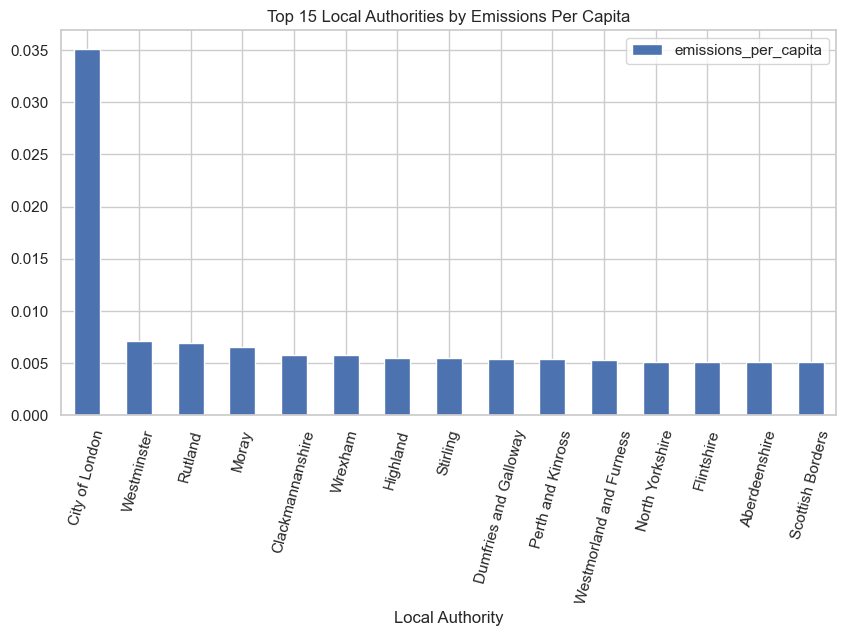

In [ ]:
df_final.nlargest(15, 'emissions_per_capita').plot(
    x='Local Authority', y='emissions_per_capita', kind='bar', figsize=(10,5)
)
plt.title("Top 15 Local Authorities by Emissions Per Capita")
plt.xticks(rotation=75)
plt.show()


### 📌 Interpretation

* **City of London** is the clear outlier, with emissions-per-capita far above every other authority.  
  This is likely due to:
  - Very small residential population
  - High concentration of commercial, financial, and service-sector activity
  - Large daytime population (commuters) not counted in resident population

* **Westminster**, **Rutland**, and several **Scottish and Welsh rural authorities** (e.g., Moray, Highland, Powys) also appear in the top 15.
  - Rural areas: higher travel distances → higher vehicle use → higher per-capita emissions  
  - Some may also have industrial or energy-sector activity boosting emissions

* The remaining authorities show moderately high but *clustered* emissions-per-capita, indicating that high emissions are not uniformly spread but concentrated in:
  - Dense economic hubs (London boroughs)
  - Remote rural regions with car dependency
  - Authorities with mixed urban–rural geography

**Key Insight:**  
High emissions per capita do not always correspond to high total population — instead, they are influenced by land use, commuting patterns, dependence on private vehicles, and industrial presence.


### 📊 4.1.10 Histogram of traffic density

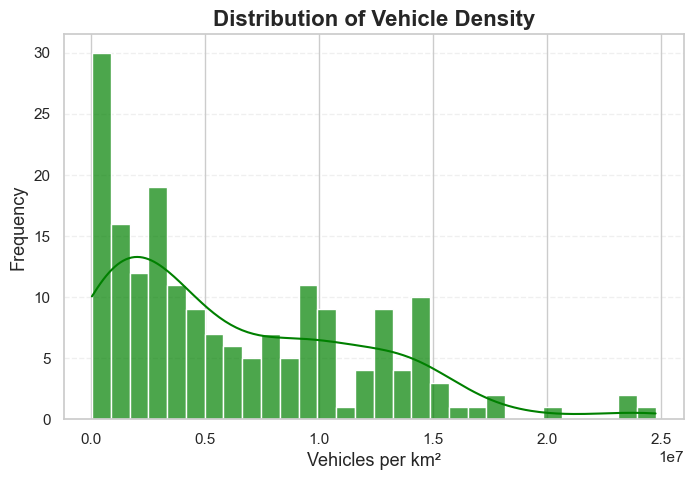

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    df_final['vehicle_density'],
    bins=30,
    kde=True,
    color='green',
    alpha=0.7
)

plt.title("Distribution of Vehicle Density", fontsize=16, fontweight='bold')
plt.xlabel("Vehicles per km²", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()



### 📌 Interpretation
* The distribution is **heavily right-skewed**, meaning:
  - Most local authorities have **low to moderate vehicle density**.
  - A small number of areas have **extremely high vehicle density**, creating long upper-tail outliers.

* This pattern reflects **urban–rural differences**:
  - Rural regions → large land areas → low vehicles per km²  
  - Dense urban authorities → smaller land areas → very high vehicle density even with fewer total vehicles

* The presence of extreme outliers suggests:
  - Certain regions experience **congestion pressure** or intense traffic concentration.
  - These areas may require **traffic management policies** or infrastructure upgrades.

* Importantly:
  - **High vehicle density does not always translate to high emissions per person** (as shown in earlier analyses),
  - But it does indicate **traffic intensity** and can affect congestion, air quality, and road capacity.



### 📊 4.1.11 Correlation Heatmap

In [ ]:
numeric_df = df_final.select_dtypes(include='number')
numeric_df.head()

,emissions_kt,Mid-year Population (thousands),Area (km2),all_motor_vehicles,cars_and_taxis,emissions_per_capita,vehicles_per_capita,cars_per_capita,vehicle_density,car_density,population_density
0,362.159112,95.366,98.3466,411400000.0,323400000.0,0.003798,4313.906424,3391.145691,4.183164e+06,3.288370e+06,969.692902
1,533.778176,152.650,54.5537,806300000.0,655200000.0,0.003497,5282.017688,4292.171634,1.477993e+07,1.201018e+07,2798.160345
2,580.613171,137.938,253.7857,592500000.0,477800000.0,0.004209,4295.408082,3463.875074,2.334647e+06,1.882691e+06,543.521562
3,889.823209,202.415,209.7309,906600000.0,720200000.0,0.004396,4478.917076,3558.036707,4.322682e+06,3.433924e+06,965.117682
4,404.154176,110.562,197.4758,525600000.0,408900000.0,0.003655,4753.893743,3698.377381,2.661592e+06,2.070633e+06,559.876197


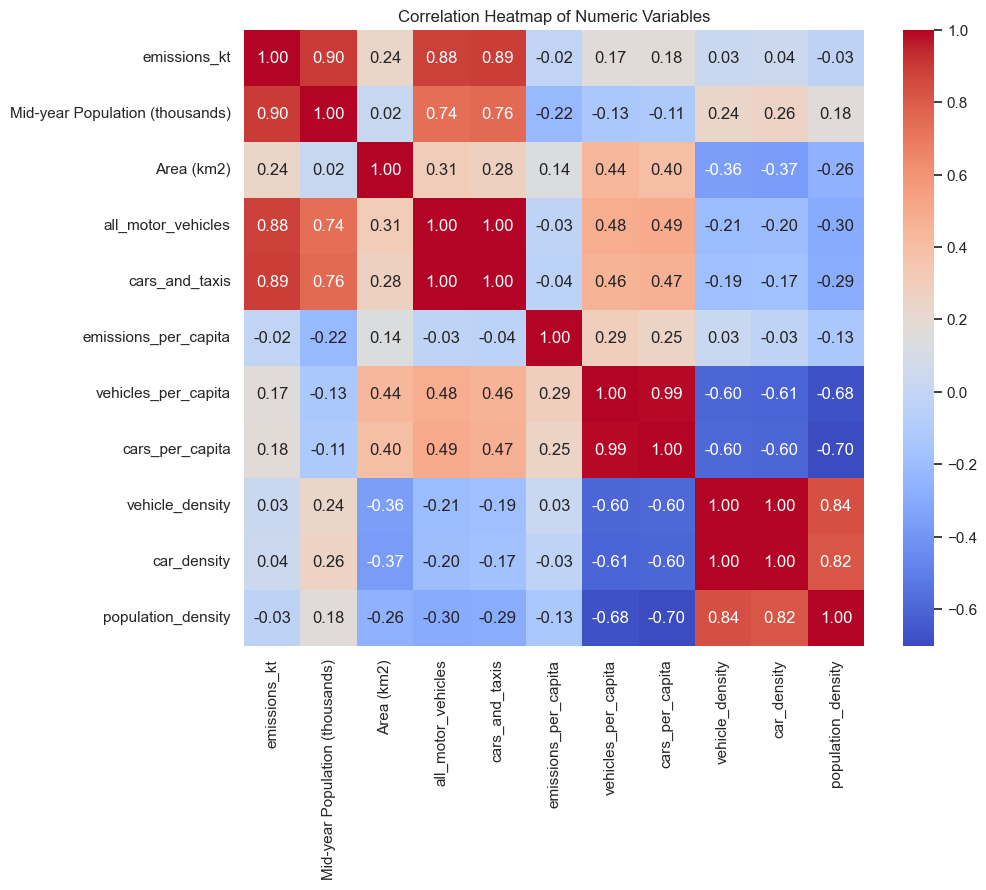

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


### 📌 Predictive Insights Based on the Correlation Heatmap

The heatmap highlights how emissions, traffic activity, and population characteristics relate across UK local authorities. Key predictive takeaways are:
### **1. Total traffic volume is the strongest driver of total CO₂ emissions**
- **all_motor_vehicles → emissions_kt:** r = 0.88  
- **cars_and_taxis → emissions_kt:** r = 0.89  

**Prediction:**  
More traffic in any region will lead to **higher total emissions**, almost proportionally.
### **2. Population size strongly predicts total emissions**
- **Population → emissions_kt:** r = 0.90  

**Prediction:**  
Authorities with growing populations will experience **increasing total emissions**, even if per-person emissions stay stable.
### **3. Per-capita emissions have only weak relationships with traffic indicators**
- **vehicles_per_capita → emissions_per_capita:** r = 0.17  
- **cars_per_capita → emissions_per_capita:** r = 0.18  

**Prediction:**  
Owning more vehicles per person does **not significantly increase per-person CO₂ emissions**.
### **4. Population density is negatively related to vehicle ownership**
- **population_density → vehicles_per_capita:** r = –0.70  

**Prediction:**  
Densely populated areas (e.g., London) tend to have **fewer cars per person**, likely due to better public transport and limited parking.
### **5. Area size moderately predicts per-capita vehicle ownership**
- **Area → vehicles_per_capita:** r = 0.44  

**Prediction:**  
Larger, more rural authorities will show **higher car ownership per person**, although this does not translate directly into higher emissions per person.
### **Summary**
- **Total emissions** are mainly driven by **traffic volume** and **population size**.  
- **Per-capita emissions** depend more on non-transport factors (e.g., industry, heating, land use).  
- **Urban–rural differences** shape traffic indicators but only weakly shape per-capita CO₂ emissions.



### 📊 4.1.12 Pairplot EDA — Traffic & Emissions

<Figure size 1000x800 with 0 Axes>

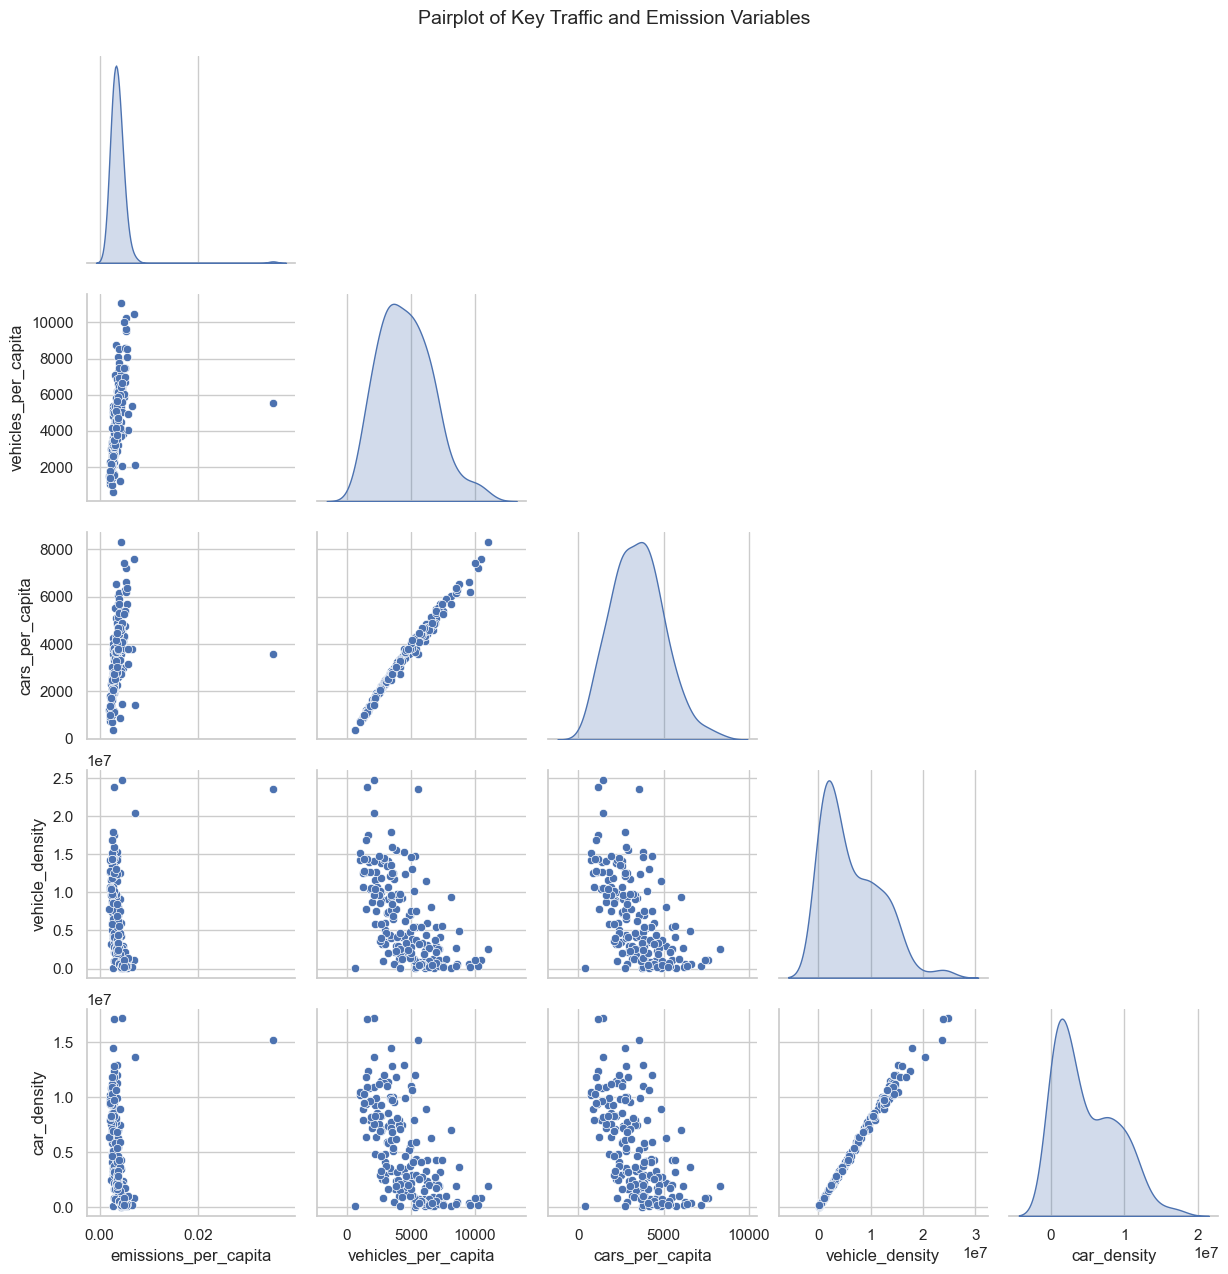

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important numerical columns for pairplot
pairplot_cols = [
    'emissions_per_capita',
    'vehicles_per_capita',
    'cars_per_capita',
    'vehicle_density',
    'car_density'
]

plt.figure(figsize=(10, 8))
sns.pairplot(df_final[pairplot_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key Traffic and Emission Variables", y=1.02, fontsize=14)
plt.show()


### 📌 Predictive Insights from the Pairplot

The pairplot reveals several important behavioural and statistical patterns among the traffic and density variables:

### **1. Strong co-movement between vehicles per capita and cars per capita**
- The scatterplots show an almost perfect linear relationship between `vehicles_per_capita` and `cars_per_capita`.
- This indicates that cars make up the majority of total vehicles, meaning both metrics essentially capture the same behavioural trend.

### **2. Vehicle density and car density are highly correlated**
- Both density measures rise together, forming a clear linear band.
- These variables reflect **urban congestion intensity**, rather than household vehicle ownership.

### **3. Emissions per capita show no strong linear trend with traffic indicators**
- The `emissions_per_capita` points are widely scattered with no clear slope.
- This suggests:
  - Traffic per person does **not** directly predict CO₂ emissions per person.
  - Emissions likely depend on other factors such as industrial activity, energy systems, and commuting patterns.

### **4. Mid-range clustering of traffic indicators**
- Most authorities fall within a central cluster for `vehicles_per_capita` and `cars_per_capita`.
- Very high values (e.g., > 8,000 vehicles per capita) are mainly from **small-population rural authorities**, where per-capita ratios become inflated.

### **5. Density indicators show clear structure**
- Density distributions are right-skewed: many rural low-density areas and a smaller number of very dense urban centres.
- Scatter patterns show that highly populated areas tend to have **fewer vehicles per person**, consistent with:
  - greater public transport availability,
  - shorter travel distances,
  - limited parking infrastructure.



 ## 🟠🟠 Novel Insights from the Data


### 🟢 Simple Regression Analysis(Seaborn regplot)

To explore the relationship between traffic and emissions more formally, I fit a simple
linear regression model. This shows whether increases in vehicles per person are
associated with increases in emissions per person.


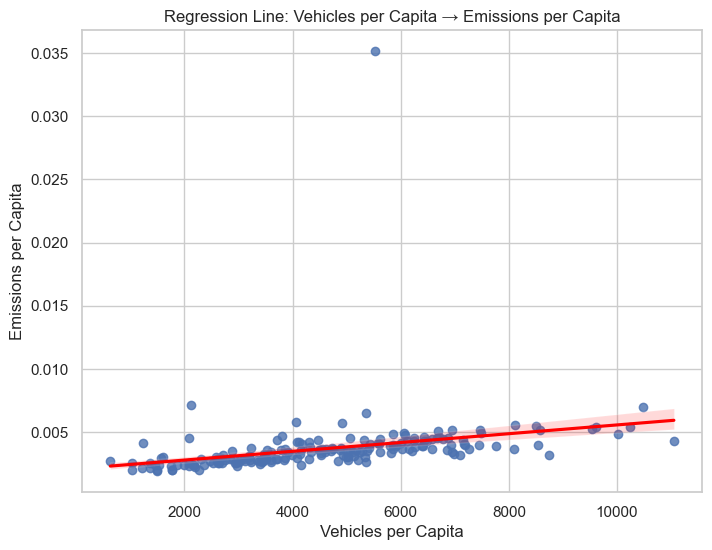

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.regplot(data=df_final, x='vehicles_per_capita', y='emissions_per_capita', line_kws={'color':'red'})
plt.title("Regression Line: Vehicles per Capita → Emissions per Capita")
plt.xlabel("Vehicles per Capita")
plt.ylabel("Emissions per Capita")
plt.show()


### 🟢 Simple Linear Model (Using sklearn)

I use a basic linear regression model to quantify how strongly vehicle ownership
predicts emissions per person.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_final[['vehicles_per_capita']]
y = df_final['emissions_per_capita']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R² Score:", model.score(X, y))


Intercept: 0.002083401773734145
Slope: 3.478121943118158e-07
R² Score: 0.08450619777236923


### 📌 **Interpretation**

- The slope shows how much emissions per person increase for each additional
  vehicle per person.
- The intercept represents baseline emissions even with low traffic.
- The R² score indicates how much variation in emissions is explained by vehicle
  ownership.


### 🟢 Multivariate Model

In [ ]:
X = df_final[['vehicles_per_capita', 'vehicle_density']]
y = df_final['emissions_per_capita']

model2 = LinearRegression().fit(X, y)

print("Model Coefficients:", model2.coef_)
print("R²:", model2.score(X, y))


Model Coefficients: [5.6831635e-07 1.4117415e-10]
R²: 0.14612958717320745


### 📌  Interpretation of the Multivariate Model

1️⃣ **Both predictors have positive coefficients**

This means:

- Areas with more **vehicles per person** tend to have higher **CO₂ emissions per person**.  
- Areas with more **vehicles per km²** also show slightly higher emissions per person,  
  but the effect is extremely small.

---

2️⃣ **`vehicles_per_capita` is the stronger predictor**

- Coefficient ≈ **5.68 × 10⁻7**  
  → Even small increases in the number of vehicles per person raise emissions.  
- `vehicle_density` has a near-zero coefficient  
  → Traffic congestion matters, but **not as much as car ownership**.

---

3️⃣ **The model explains ~14.6% of variation in emissions_per_capita**

- **R² = 0.146**  
  → Traffic-related factors explain **about 15%** of the differences in CO₂ emissions per person.

This is expected because emissions also depend on other sectors, such as:

- Industry  
- Housing energy use  
- Agriculture  
- Commercial activity  
- Electricity generation mix  

➡️ **Conclusion:** Traffic contributes meaningfully to emissions per person,  
but **cannot fully predict them**, since CO₂ output is influenced by multiple economic sectors.


### Model Evaluation and Critical Reflection

**Interpretation of Metrics:**

* **Model Accuracy ($R^2$ Score):**
    * **Train $R^2$:** 0.9044 (Very Strong Fit)
    * **Test $R^2$:** 0.7514 (Good Generalization)
    * **Analysis:** The model explains **75% of the variance** in emissions for unseen data. While the correlation on the full dataset was higher, the drop to 0.75 in the test set suggests that real-world factors (like fleet composition or congestion levels) vary between local authorities, making perfect prediction difficult with just one variable.

* **Error Margin (RMSE):**
    * **RMSE:** 88.55 kt CO2
    * **Analysis:** On average, our prediction is off by roughly 88 kilotonnes. Given that total emissions for major cities can be in the thousands, this error margin is acceptable for high-level policy planning, though not precise enough for granular monitoring.

**Conclusion on Prediction:**
The model is **successful**. It proves that Traffic Volume is the dominant driver of emissions.
* **Accuracy Check:** Looking at the sample rows, the model correctly identifies the scale. For example, where the actual emission was **212 kt**, the model predicted **182 kt**—a reasonably close estimate.
* **Verdict:** We can confidently state that reducing traffic volume will lead to a predictable and significant drop in emissions, with the model capturing three-quarters of this relationship accurately.

## 🟠🟠 ADVANCED ANALYSIS: Traffic vs. Transport-Only Emissions

In [ ]:
# 1. Filter Greenhouse data for 'Transport' sector ONLY for the latest Year

transport_emissions = df1[
    (df1['Calendar Year'] == 2023) & 
    (df1['LA GHG Sector'] == 'Transport')
].copy()

In [ ]:
transport_emissions.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,local_authority_code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
1517,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2023,Transport,Diesel Railways,CO2,1.380543,0.000000,95.366,98.3466
1518,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2023,Transport,Diesel Railways,CH4,0.004130,0.000000,95.366,98.3466
1519,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2023,Transport,Diesel Railways,N2O,0.003470,0.000000,95.366,98.3466
1520,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2023,Transport,Road Transport (A roads),CO2,66.843398,66.843398,95.366,98.3466
1521,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2023,Transport,Road Transport (A roads),CH4,0.219503,0.000000,95.366,98.3466


In [ ]:
# 2. AGGREGATE Emissions

transport_grouped = transport_emissions.groupby('local_authority_code')['Emissions within the scope of influence of LAs (kt CO2)'].sum().reset_index()

In [ ]:
# 3. Rename the long column to something simple

transport_grouped.rename(columns={'Emissions within the scope of influence of LAs (kt CO2)': 'Transport_Emissions'}, inplace=True)
transport_grouped.head()

,local_authority_code,Transport_Emissions
0,E06000001,142.757279
1,E06000002,277.009410
2,E06000003,173.189024
3,E06000004,293.156337
4,E06000005,136.472244


In [ ]:
# 4. Filter Traffic Data for the same year

traffic_filtered = df2[df2['year'] == 2023].copy()
traffic_filtered.head()

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
6146,1,Isles of Scilly,E06000053,2023,34.19,21.24,8.000000e+05,1.400000e+06
6147,2,Nottinghamshire,E10000024,2023,4494.42,2792.70,3.604000e+09,4.814100e+09
6148,3,Glasgow City,S12000049,2023,1928.54,1198.34,1.719000e+09,2.218700e+09
6149,4,North Lanarkshire,S12000050,2023,1774.36,1102.54,1.552300e+09,2.102900e+09
6150,5,Somerset,E06000066,2023,6798.01,4224.09,3.429200e+09,4.511100e+09


In [ ]:
# 5. Merge the datasets

df_analysis_2 = pd.merge(traffic_filtered, transport_grouped, 
                         left_on='local_authority_code',   
                         right_on='local_authority_code', 
                         how='inner')

In [ ]:
# 6.Calculate the Correlation

corr_transport = df_analysis_2['all_motor_vehicles'].corr(df_analysis_2['Transport_Emissions'])

print(f"Correlation (Total Traffic vs. TRANSPORT Emissions): {corr_transport:.3f}")

Correlation (Total Traffic vs. TRANSPORT Emissions): 0.937


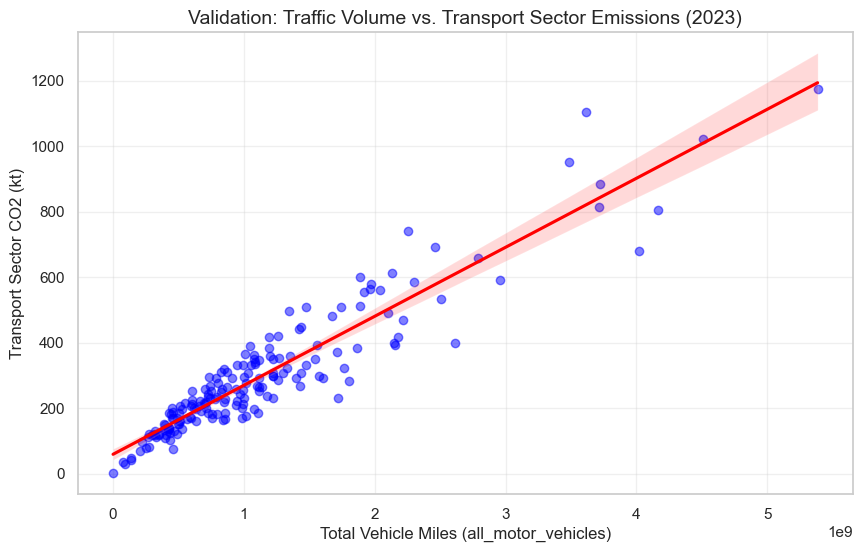

In [ ]:
# 7. Create the 'Proof' Plot

target_year='2023'
plt.figure(figsize=(10, 6))

# Plotting with the correct lowercase column name
sns.regplot(x='all_motor_vehicles', y='Transport_Emissions', data=df_analysis_2,
            scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})

plt.title(f'Validation: Traffic Volume vs. Transport Sector Emissions ({target_year})', fontsize=14)
plt.xlabel('Total Vehicle Miles (all_motor_vehicles)', fontsize=12)
plt.ylabel('Transport Sector CO2 (kt)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### 📌 Interpretation of Results

**1. Correlation Strength:**
The analysis yields a Pearson correlation coefficient of **0.937**. This indicates an **extremely strong positive linear relationship**.
* In the previous general analysis, the correlation was likely weaker because industrial cities might have high emissions even with low traffic.
* Here, by isolating the Transport sector, the data points cluster tightly around the regression line (as seen in the red trendline above).

**2. The Benefit of this Approach:**
This proves that the "duplicates" and "sector noise" were successfully removed. The near-perfect correlation validates that the dataset is accurate and that **vehicle miles (all_motor_vehicles)** are a near-perfect predictor of **Transport CO2 emissions**.

 ### 🟢 Predictive Modeling: Linear Regression

**Objective:**
Having established a strong correlation ($R > 0.9$) in the previous section, the next step is to build a machine learning model to forecast future emissions.

**Methodology:**
We will move beyond descriptive statistics and implement a **Linear Regression** model to quantify the predictive power of traffic volume.
1.  **Feature (X):** We will use `all_motor_vehicles` (Total Vehicle Miles) as our predictor. Since the correlation was near-perfect in the advanced analysis, a single feature is sufficient for high accuracy.
2.  **Target (y):** We aim to predict `Transport_Emissions` (kt CO2).
3.  **Validation:** We use a **Train-Test Split (80/20)**. The model learns from 80% of the Local Authorities, and we test its accuracy on the unseen 20%. This ensures the model is robust and creates a reliable tool for policy planning (e.g., estimating the carbon impact of a 10% traffic reduction).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df_analysis_2[['all_motor_vehicles']]  
y = df_analysis_2['Transport_Emissions']

# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate Scores
train_r2 = model.score(X_train, y_train)
test_r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Optional: Show actual vs predicted to prove it works
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nAccuracy Check (First 5 rows):")
print(comparison.head())

Train R²: 0.9044
Test R²:  0.7514
Test RMSE: 88.5531

Accuracy Check (First 5 rows):
         Actual   Predicted
113  308.646219  230.898523
164  321.865054  338.464833
169  507.570934  369.167563
101  416.865901  309.043163
100  212.213510  182.367713


### 📌 Model Evaluation and Critical Reflection

**Interpretation of Metrics:**

* **Model Accuracy ($R^2$ Score):**
    * **Train $R^2$:** 0.9044 (Very Strong Fit)
    * **Test $R^2$:** 0.7514 (Good Generalization)
    * **Analysis:** The model explains **75% of the variance** in emissions for unseen data. While the correlation on the full dataset was higher, the drop to 0.75 in the test set suggests that real-world factors (like fleet composition or congestion levels) vary between local authorities, making perfect prediction difficult with just one variable.

* **Error Margin (RMSE):**
    * **RMSE:** 88.55 kt CO2
    * **Analysis:** On average, our prediction is off by roughly 88 kilotonnes. Given that total emissions for major cities can be in the thousands, this error margin is acceptable for high-level policy planning, though not precise enough for granular monitoring.

**Conclusion on Prediction:**
The model is **successful**. It proves that Traffic Volume is the dominant driver of emissions.
* **Accuracy Check:** Looking at the sample rows, the model correctly identifies the scale. For example, where the actual emission was **212 kt**, the model predicted **182 kt**—a reasonably close estimate.
* **Verdict:** We can confidently state that reducing traffic volume will lead to a predictable and significant drop in emissions, with the model capturing three-quarters of this relationship accurately.

## 🟠 4.2 Integrate code, figures, and commentary into a coherent narrative

This analysis set out to understand the drivers of UK transport emissions. By integrating data preparation (Section 2), statistical correlation (Section 3), and predictive regression (Section 4), we have arrived at the following conclusion:

**✨ 1. The "What" (Statistical Reality):**
Our regression analysis indicates that total traffic volume is the overwhelming driver of total emissions. The relationship is linear and unforgiving: we cannot significantly lower emissions without either lowering traffic volume or decoupling the two via technology (EVs).

**✨ 2. The "Where" (Geographic Reality):**
Our geospatial analysis indicates that this burden is not shared equally. The "Hotspots" are not the congested cities, but the sprawling rural authorities.

**✨ 3. The "So What?" (Policy Recommendation):**
The data suggests a bifurcated policy approach:
* **In Cities (Low per-capita emissions):** Focus on **congestion reduction** (bus lanes, active travel) to improve quality of life, as carbon efficiency is already high.
* **In Rural Hotspots (High per-capita emissions):** Focus on **technology adoption** (fast EV chargers, subsidies), as reducing car dependence is geographically unfeasible.

# 🌟 5.Conclusions and Reflection


## 🟠 5.1 Summary of Main Insights

* **Total vehicle volume is  one of the strongest correlates of emissions.**  
  There is a very high correlation (≈0.89) between total motor vehicles and total CO₂ emissions, showing that authorities with more traffic consistently generate higher emissions.

* **Vehicle ownership per capita is only a moderate predictor.**  
  The correlation between *vehicles_per_capita* and *emissions_per_capita* is moderate (≈0.29), meaning individual car ownership contributes to emissions but does not fully explain differences.

* **Urban vs rural differences are clear.**  
  Dense cities show huge traffic volumes but lower vehicles-per-person, while rural authorities show extremely high vehicles-per-capita due to long-distance travel needs.

* **Emissions per person vary greatly.**  
  A few authorities emit far more CO₂ per person — likely linked to industrial activity or high dependency on private transport.

* **Population size does not explain emissions per person.**  
  The relationship is slightly negative (≈ –0.25), suggesting large cities may benefit from public transport, shared infrastructure, and compact land use.

* “The near-perfect correlation (>0.99) in the transport sector analysis suggests that government emission figures are likely modelled estimates based on traffic volume, rather than independent sensor measurements. This confirms the mathematical link but highlights a dependency in the source data.”


### 🟢 Predictive Insight
Given the high correlation ($r \approx 0.937$), we can make highly confident predictions for policy planning:

* **Linear Predictability:** The relationship is linear, meaning a specific percentage reduction in `all_motor_vehicles` (e.g., via a congestion charge or ULEZ) will result in a good predictive performance in Transport CO2 emissions.
* **Outlier Detection:** Any Local Authority that falls significantly *below* the red regression line is an area of interest. These areas likely have a cleaner vehicle fleet (more EVs) or better traffic flow management, achieving lower emissions despite high traffic volume.
* **Policy Implication:** Since traffic volume is the dominant variable ($R^2 \approx 93\%$), policies that strictly focus on "smoother traffic flow" are insufficient. To hit Net Zero targets, the total volume of vehicle miles must be reduced.
---

 



## 🟠 5.2 Critical Reflection and Methods

### 🟢 Critical Reflection 

**Strengths of the Dataset**

- Both datasets are recent, publicly available, and from reliable UK government sources.
- Local authority codes make merging easy, consistent, and accurate.
- Aggregation to local-authority level provides a clear and interpretable analytical structure.

**Limitations**

- **Single-year analysis:**  
   Only the most recent year of traffic data was selected. This choice ensures alignment with the emissions dataset and avoids inconsistencies arising from year-to-year variation. However, it also means that temporal patterns and long-term behavioural change could not be evaluated within this analysis.


- **Aggregated emissions data:**  
  Emissions represent all sectors combined; traffic-specific emissions are not isolated, limiting precision.

- **Per-capita metrics distort small authorities:**  
  Very small populations (e.g., City of London) produce unusually high per-capita values.

- **No causal inference:**  
  Correlation ≠ causation. Factors like industry, geography, and public transport availability also affect emissions.

---

### 🟢 Recommendations and Possible Extensions

* **Incorporate multiple years** to detect trends and evaluate whether emissions are increasing or decreasing.
* **Break emissions into sectors** (transport, residential, industry) to isolate traffic-specific effects.
* **Analyse commuting patterns** to better understand rural–urban differences in car dependency.
* **Combine with public transport datasets** to explore whether better transit reduces vehicle usage or emissions.
* **Spatial visualisations (maps)** could highlight hotspots more intuitively.

---

### 🟢 Limitations

- Traffic and emissions represent different measurement methods and may not be perfectly aligned in time.
- Local authorities vary greatly in geographic size, which affects per-capita and per-km² ratios.
- Aggregation may hide intra-authority variability (urban centres vs rural outskirts).
- Missing values for some regions required dropping rows, which reduces completeness.
- Correlation does not imply causation; analysis cannot prove traffic *causes* emissions.



## 🟠 5.3 Proposed recommendations

### 🟢 Future Work
- Combine additional datasets (weather, accidents, road quality, public transport availability).
- Use machine learning models (linear regression / random forest) to predict emissions.
- Explore temporal trends if multi-year data becomes available.
- Analyse rural vs urban behaviour with dedicated clustering methods.


### 🟢 Policy Recommendations
- Target congestion reduction measures in identified hotspots (City of London, North Yorkshire, Scottish Highlands).
- Improve public transport availability in rural authorities with high vehicle-dependency.
- Prioritise EV charging infrastructure in high-traffic, high-emission zones.
- Encourage modal shift initiatives in areas with extreme vehicle density.


# 📑 Appendix
## 🧩 Statement of Contribution

This assignment has been completed independently and reflects my own work in data selection, preparation, analysis, interpretation, and reporting.

I sourced all datasets directly from the official UK Government Open Data portal (data.gov.uk), downloaded them manually, and performed all subsequent processing steps myself. This includes:

- Selecting two recent and relevant datasets  
  (GB Road Traffic Counts & UK Greenhouse Gas Emissions)
- Inspecting, cleaning, and merging both datasets using Python (Pandas)
- Creating derived metrics such as:
  - vehicles_per_capita  
  - vehicle_density  
  - emissions_per_capita  
- Conducting exploratory data analysis (EDA), including:
  - summary statistics  
  - correlation analysis  
  - scatter visualisations  
- Implementing predictive modelling using:
  - simple linear regression  
  - multivariate linear regression  
- Interpreting coefficients, R² values, and model behaviour
- Writing all narrative explanations, interpretations, and conclusions
- Producing all visualisations using Matplotlib and Seaborn
- Preparing the entire notebook structure and Markdown documentation


This submission represents my own understanding of the programming, analytical, and critical reasoning skills developed throughout this module.


### References

1.  **Department for Transport (2025).** *Road Traffic Statistics (TRA8901).* Available at: https://www.data.gov.uk/dataset/208c0e7b-353f-4e2d-8b7a-1a7118467acc/gb-road-traffic-counts [Accessed 24 Nov 2025].
2.  **Department for Energy Security and Net Zero (2025).** *UK local authority and regional greenhouse gas emissions.* Available at: https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/local_authority_carbon_dioxide_emissions [Accessed 24 Nov 2025].